<a href="https://colab.research.google.com/github/SqweeksOp/AV-Job-a-thon/blob/main/DFS_training_retailer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl

import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
path="/content/drive/MyDrive/Project_data/DFS_Data/Retailer/Train/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/DFS_Data/Retailer/Train"):
    if filename.endswith(".csv"):
      if count==0:
        df1=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df1=df1.append(df)
      if count==2000:
        break
      count+=1
print(count)

Loading Data...
2000


In [6]:
import os
path="/content/drive/MyDrive/Project_data/DFS_Data/Retailer/Test/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/DFS_Data/Retailer/Test"):
    if filename.endswith(".csv"):
      if count==0:
        df_test=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df_test=df_test.append(df)
      if count==500:
        break
      count+=1
print(count)

Loading Data...
499


In [7]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               11.0  ...        60.0        1.0
9    9.0               60.0  ...        19.0        1.0
10  10.0               75.0  ...        18.0        1.0
11  11.0               25.0  ...        53.0        0.0
12  12.0               60.0  ...        37.0        1.0

[5 rows x 14 columns]

In [8]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               12.0  ...        73.0        1.0
9    9.0               82.0  ...         0.0        1.0
10  10.0               64.0  ...        17.0        1.0
11  11.0               14.0  ...        58.0        1.0
12  12.0               73.0  ...         5.0        0.0

[5 rows x 14 columns]

In [9]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [10]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (70035, 13)
shape of test set  set is (17465, 13)
shape of train labels  set is (70035,)
shape of test labels  set is (17465,)


- Remove Correlated filter

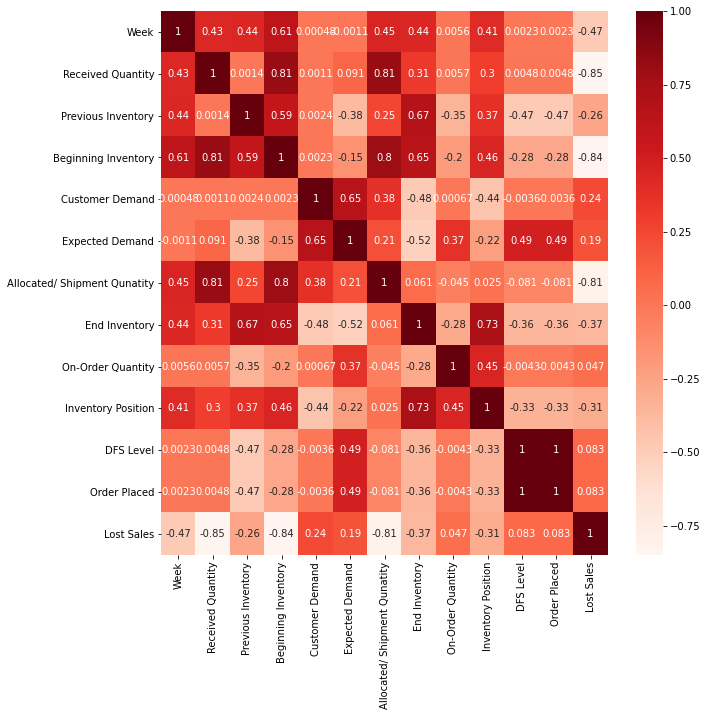

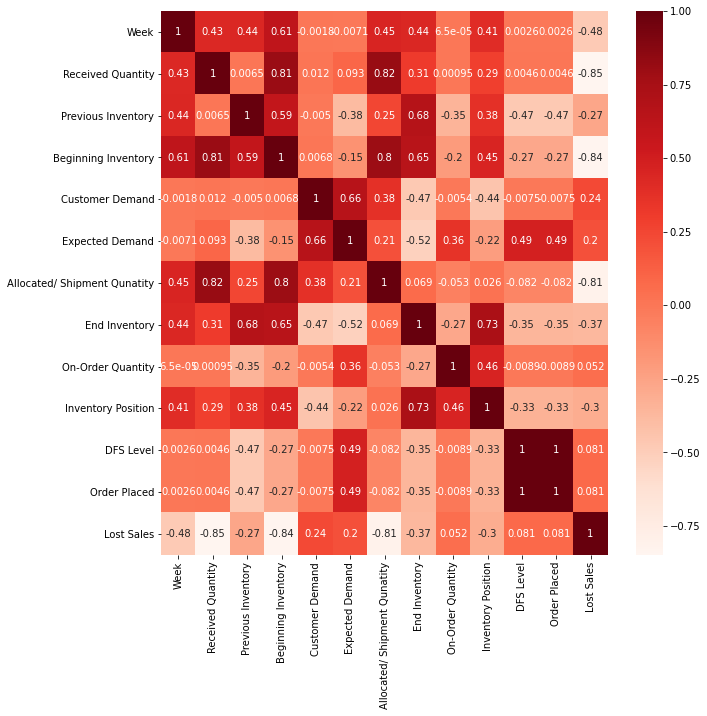

In [11]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [12]:
X_train=X_train.drop(labels=["Expected Demand","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


In [13]:
X_train.head()

Week  Received Quantity  ...  Order Placed  Lost Sales
8    8.0               11.0  ...          75.0        60.0
9    9.0               60.0  ...          85.0        19.0
10  10.0               75.0  ...          79.0        18.0
11  11.0               25.0  ...          93.0        53.0
12  12.0               60.0  ...          78.0        37.0

[5 rows x 10 columns]

In [14]:
X_train.shape

(70035, 10)

In [15]:
X_test.shape

(17465, 10)

- Correlation


In [16]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 70035
    Positive: 22570 (32.23% of total)



In [17]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 17465
    Positive: 5718 (32.74% of total)



In [18]:
!pip install imbalanced-learn

In [19]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [21]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 47465, 1: 22570})


Counter({0: 11747, 1: 5718})

OVER and Under Sampling pipeline

OVER SAMPLING

In [22]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.70)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 47465, 1: 33225})


UNDER SAMPLING

In [23]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 33225, 1: 33225})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [24]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
66440  1
66441  1
66442  1
66443  1
66444  1
66445  1
66446  1
66447  1
66448  1
66449  1

In [25]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...           7           8          9
66420  19.730550  73.378242  29.378242  ...   82.000000   72.512967   0.000000
66421  40.096791  73.096791  20.612835  ...   96.000000   74.516044   0.000000
66422  16.485676  75.514324   6.000000  ...   89.495225   72.000000   0.000000
66423  19.000000  70.482930  23.034141  ...   83.758535   73.482930   0.000000
66424  11.360292  61.000000   0.000000  ...   95.819854  101.966910   7.606618
66425   9.847716  68.695433   0.000000  ...   76.152284   75.304567   1.847716
66426  30.000000  97.022938   0.000000  ...   87.022938   82.954124   0.000000
66427   9.809893  73.809893   0.000000  ...   74.570322   96.809893   7.000000
66428  11.000000   0.697747  13.953379  ...   81.302253   77.174437  74.476690
66429  13.387083  81.000000   0.612917  ...   90.225833   70.548334   0.000000
66430   9.268158  71.821228   0.000000  ...   90.089386   69.642456  10.089386
66431  26.777181  75.259060  14.481880  ...   73.259060   77.518120   0.000000
66432  22.055397  93.944603   0.000000  ...   89.944603   80.612219   0.000000
66433  40.333362  68.333362  26.000000  ...   78.333362   75.000044  12.000000
66434  23.025473  85.341824   0.000000  ...   80.000000   82.683648   4.316352
66435  25.848506  62.424253  24.000000  ...   79.151494   84.424253   0.424253
66436  28.595064  71.595064  19.000000  ...   81.404936   80.107405   5.702468
66437  12.327031  78.000000   0.000000  ...   86.009453   92.990547  30.000000
66438  29.000000  76.230257  11.769743  ...   83.460515   79.539485   0.000000
66439  14.441032  59.676904   0.000000  ...  106.220516   87.558968  26.441032
66440  19.480324  85.000000   0.000000  ...   92.320216   98.280865   0.000000
66441  14.467214  76.065572   0.000000  ...   94.000000   90.401642   5.401642
66442  40.309927  84.230024  32.309927  ...  102.539951   62.309927   0.000000
66443  11.767152  74.691788   0.000000  ...  107.383576   85.924636   0.000000
66444  22.994362  98.000000   0.000000  ...   91.242952   88.005638   0.000000
66445  19.887166  72.887166  19.556417  ...   81.112834   69.887166   0.000000
66446  25.773912  76.000000  10.386956  ...   88.226088   67.452177   1.839133
66447  23.000000  83.001166   7.000583  ...   72.000583   78.997667   2.998251
66448  34.169825  85.830175  22.169825  ...   93.723275   74.723275   0.000000
66449   9.044201  51.029467   0.000000  ...   89.029467   68.103135  31.955799

[30 rows x 10 columns]

In [26]:
X_train.shape

(66450, 10)

In [27]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 66450
    Positive: 33225 (50.00% of total)



In [28]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [29]:
train_df.shape

(59805, 10)

In [30]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 59805
    Positive: 29894 (49.99% of total)



In [31]:
a=pd.DataFrame(bool_train_labels)
a.shape

(59805, 1)

In [32]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (59805,)
Validation labels shape: (6645,)
Test labels shape: (17465,)
Training features shape: (59805, 10)
Validation features shape: (6645, 10)
Test features shape: (17465, 10)


In [33]:
from sklearn.decomposition import PCA

In [34]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [35]:
var_ratio

{2: 0.5840263728914681,
 3: 0.7417760497743829,
 4: 0.8555513779691705,
 5: 0.9386908489673215,
 6: 0.9734847969334247,
 7: 0.9999906641585578,
 8: 0.9999971743990268,
 9: 0.9999993527478558}

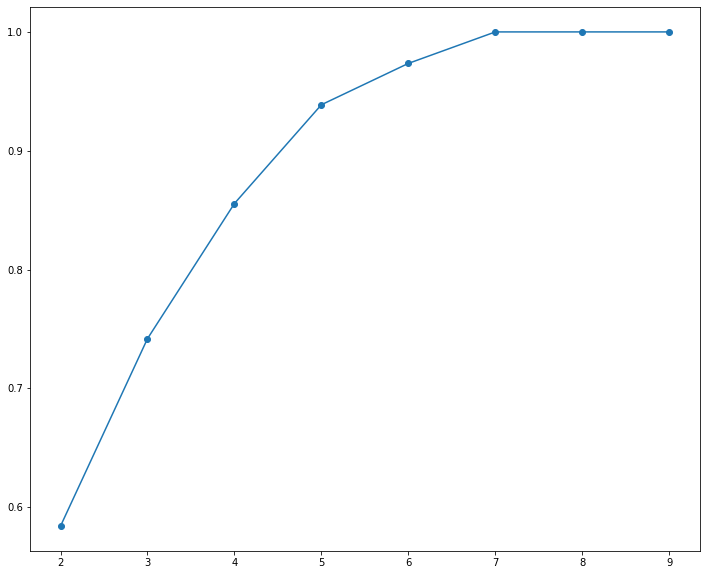

In [36]:
pd.Series(var_ratio).plot(marker="o")

In [37]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 0.47801039,  0.56845933, -0.36090367,  0.07006078, -1.56096237,
         0.53901151],
       [-1.68957321, -0.95042124, -0.45155428, -0.30097129,  0.17838053,
        -0.28836624],
       [-0.41104073,  0.45972694, -1.63785572, -2.13118825, -1.0392272 ,
         0.79045567],
       ...,
       [ 2.35084729,  0.89313717, -1.21566054, -0.10767585, -0.10294998,
        -0.43076076],
       [ 2.2439547 ,  0.03143546, -0.18316942, -0.37172459,  1.5708829 ,
         0.14422862],
       [-4.76880707,  2.30618188, -0.46052205, -1.31817695,  0.49640905,
         0.22046329]])

In [38]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [39]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0      0.478010  0.568459 -0.360904  0.070061 -1.560962  0.539012
1     -1.689573 -0.950421 -0.451554 -0.300971  0.178381 -0.288366
2     -0.411041  0.459727 -1.637856 -2.131188 -1.039227  0.790456
3      1.090371 -0.891771 -0.308850 -1.177642  0.503067 -0.058373
4      0.091477 -0.842632 -1.279435  1.650238  0.399938  0.276120
...         ...       ...       ...       ...       ...       ...
59800  3.428779  1.944479  1.070071  0.127702  0.765289 -0.106460
59801 -1.049251 -0.940887 -0.648099  0.660881 -1.362782 -0.473855
59802  2.350847  0.893137 -1.215661 -0.107676 -0.102950 -0.430761
59803  2.243955  0.031435 -0.183169 -0.371725  1.570883  0.144229
59804 -4.768807  2.306182 -0.460522 -1.318177  0.496409  0.220463

[59805 rows x 6 columns]

In [40]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [41]:
pos_df.shape

(29894, 6)

In [42]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [43]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [44]:
val_features.shape

(6645, 1, 6)

In [45]:
test_features.shape

(17465, 1, 6)

In [46]:
train_features.shape

(59805, 1, 6)

In [47]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout

In [48]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.LSTM(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.LSTM(30,activation ="relu"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [49]:
EPOCHS = 150
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [50]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 30)             4440      
_________________________________________________________________
dropout (Dropout)            (None, 1, 30)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,791
Trainable params: 11,791
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.predict(train_features[:10])

array([[0.2889708 ],
       [0.28816772],
       [0.28842133],
       [0.29120088],
       [0.29113412],
       [0.2900175 ],
       [0.28714842],
       [0.28968835],
       [0.28930998],
       [0.2898674 ]], dtype=float32)

In [52]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7902


In [53]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.00056851])

In [54]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.49910304],
       [0.5014058 ],
       [0.5035052 ],
       [0.50377864],
       [0.5006966 ],
       [0.5020445 ],
       [0.49907655],
       [0.5029651 ],
       [0.50100267],
       [0.50487036]], dtype=float32)

In [55]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6934


In [56]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [57]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [58]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [59]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [60]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

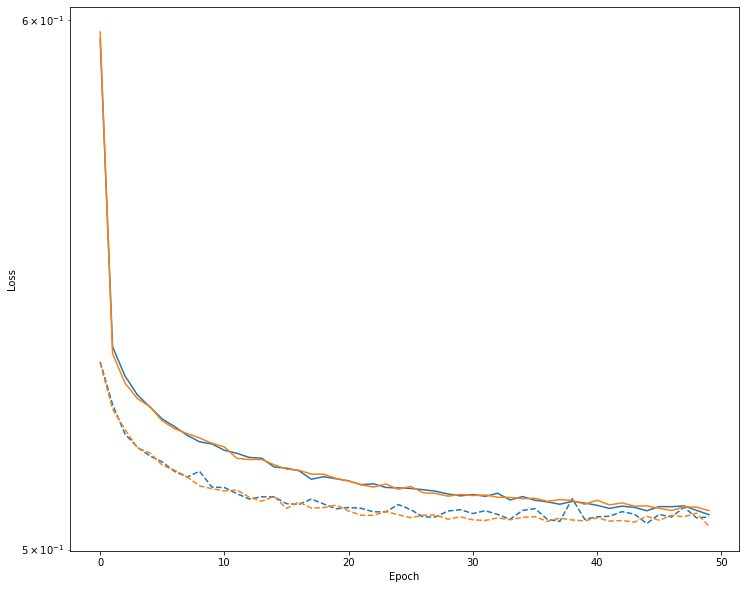

In [61]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [62]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
234/234 [==============================] - 7s 11ms/step - loss: 0.6466 - tp: 13487.5319 - fp: 6367.0426 - tn: 12063.9149 - fn: 4932.5787 - accuracy: 0.6903 - precision: 0.6747 - recall: 0.7365 - auc: 0.7493 - val_loss: 0.5351 - val_tp: 2465.0000 - val_fp: 908.0000 - val_tn: 2406.0000 - val_fn: 866.0000 - val_accuracy: 0.7330 - val_precision: 0.7308 - val_recall: 0.7400 - val_auc: 0.8064
Epoch 2/150
234/234 [==============================] - 1s 5ms/step - loss: 0.5381 - tp: 11099.1702 - fp: 4211.7745 - tn: 10912.9447 - fn: 3982.1787 - accuracy: 0.7279 - precision: 0.7243 - recall: 0.7357 - auc: 0.8032 - val_loss: 0.5245 - val_tp: 2519.0000 - val_fp: 945.0000 - val_tn: 2369.0000 - val_fn: 812.0000 - val_accuracy: 0.7356 - val_precision: 0.7272 - val_recall: 0.7562 - val_auc: 0.8155
Epoch 3/150
234/234 [==============================] - 1s 5ms/step - loss: 0.5277 - tp: 11219.3617 - fp: 4145.5447 - tn: 10933.3574 - fn: 3907.8043 - accuracy: 0.7350 - precision: 0.7308 - recall: 

In [63]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

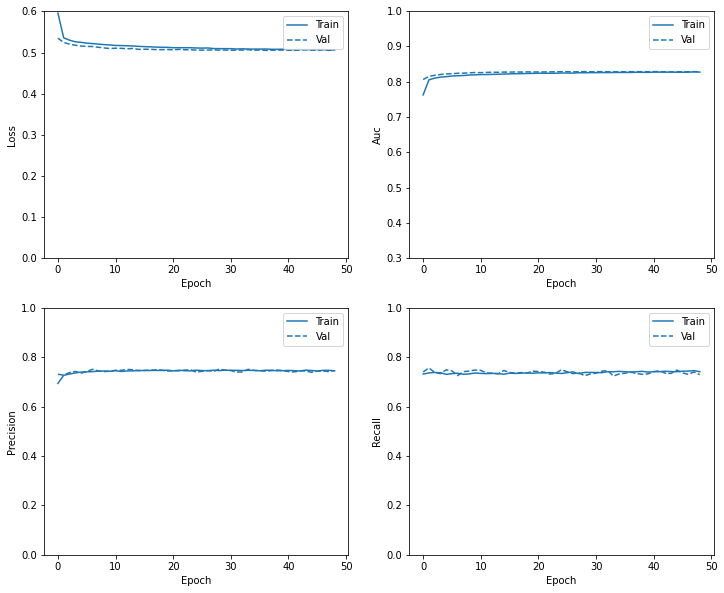

In [64]:
plot_metrics(baseline_history)

In [65]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [66]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.4956321716308594
tp :  4061.0
fp :  2679.0
tn :  9068.0
fn :  1657.0
accuracy :  0.7517320513725281
precision :  0.6025222539901733
recall :  0.7102133631706238
auc :  0.8268261551856995

(True Negatives):  9068
 (False Positives):  2679
(False Negatives):  1657
 (True Positives):  4061
Total Transactions:  5718


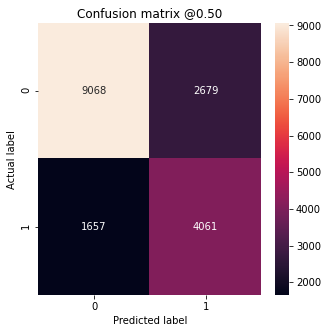

In [67]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# LSTM

In [68]:
test_predictions_baseline

array([[0.93725246],
       [0.95565546],
       [0.85241294],
       ...,
       [0.06590956],
       [0.11156312],
       [0.08750242]], dtype=float32)

In [69]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

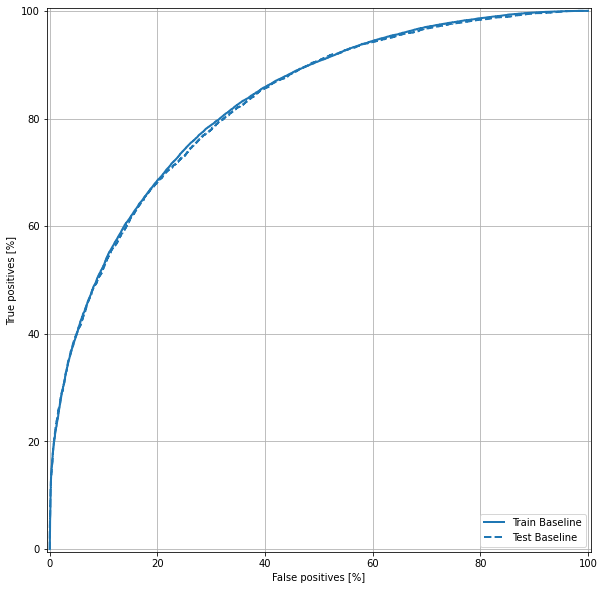

In [70]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [71]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [72]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/150
234/234 [==============================] - 6s 10ms/step - loss: 0.6459 - tp: 15267.0426 - fp: 8367.4426 - tn: 18465.0383 - fn: 5571.5447 - accuracy: 0.7082 - precision: 0.6360 - recall: 0.7328 - auc: 0.7711 - val_loss: 0.5350 - val_tp: 2445.0000 - val_fp: 881.0000 - val_tn: 2433.0000 - val_fn: 886.0000 - val_accuracy: 0.7341 - val_precision: 0.7351 - val_recall: 0.7340 - val_auc: 0.8065
Epoch 2/150
234/234 [==============================] - 1s 5ms/step - loss: 0.5370 - tp: 11101.3872 - fp: 4191.4681 - tn: 10921.0426 - fn: 3992.1702 - accuracy: 0.7286 - precision: 0.7265 - recall: 0.7332 - auc: 0.8041 - val_loss: 0.5255 - val_tp: 2481.0000 - val_fp: 910.0000 - val_tn: 2404.0000 - val_fn: 850.0000 - val_accuracy: 0.7351 - val_precision: 0.7316 - val_recall: 0.7448 - val_auc: 0.8147
Epoch 3/150
234/234 [==============================] - 1s 5ms/step - loss: 0.5328 - tp: 11151.3702 - fp: 4112.6000 - tn: 10955.2894 - fn: 3986.8085 - accuracy: 0.7318 - precision: 0.7298 - recall: 

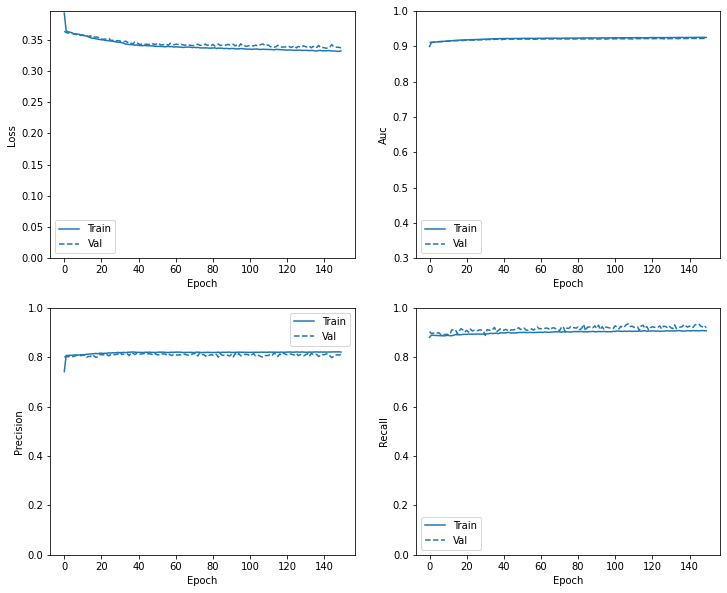

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.37810346484184265
tp :  1902.0
fp :  4757.0
tn :  19035.0
fn :  254.0
accuracy :  0.8068829774856567
precision :  0.28562846779823303
recall :  0.8821892142295837
auc :  0.9157237410545349

(True Negatives):  19035
 (False Positives):  4757
(False Negatives):  254
 (True Positives):  1902
Total Transactions:  2156


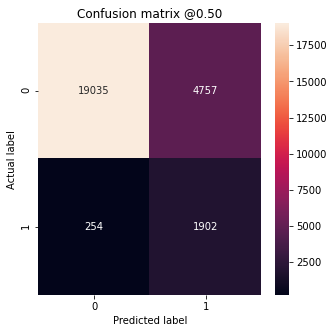

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

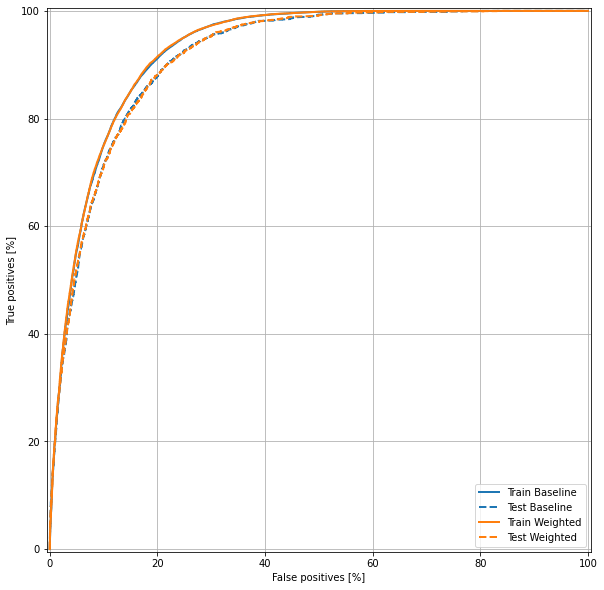

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [73]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [74]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(29911, 1, 6)

In [75]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(59822, 1, 6)

In [76]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [77]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[-5.23349643  2.08948485 -0.36692227 -1.08313113  1.65349207 -0.30076735]]

Label:  1


In [78]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [79]:
resampled_ds

<PrefetchDataset shapes: ((None, 1, 6), (None,)), types: (tf.float64, tf.int64)>

In [80]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5234375


In [81]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

234.0

In [82]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/150
234/234 [==============================] - 6s 11ms/step - loss: 0.6462 - tp: 13694.5362 - fp: 6509.0511 - tn: 11839.6128 - fn: 4808.7106 - accuracy: 0.6899 - precision: 0.6740 - recall: 0.7423 - auc: 0.7503 - val_loss: 0.5343 - val_tp: 2461.0000 - val_fp: 884.0000 - val_tn: 2430.0000 - val_fn: 870.0000 - val_accuracy: 0.7360 - val_precision: 0.7357 - val_recall: 0.7388 - val_auc: 0.8076
Epoch 2/150
234/234 [==============================] - 2s 7ms/step - loss: 0.5339 - tp: 11176.2511 - fp: 4214.4596 - tn: 10866.0468 - fn: 3950.1532 - accuracy: 0.7299 - precision: 0.7260 - recall: 0.7383 - auc: 0.8073 - val_loss: 0.5255 - val_tp: 2491.0000 - val_fp: 922.0000 - val_tn: 2392.0000 - val_fn: 840.0000 - val_accuracy: 0.7348 - val_precision: 0.7299 - val_recall: 0.7478 - val_auc: 0.8148
Epoch 3/150
234/234 [==============================] - 2s 7ms/step - loss: 0.5319 - tp: 11134.4596 - fp: 4081.0298 - tn: 11050.3106 - fn: 3941.1106 - accuracy: 0.7335 - precision: 0.7302 - recall: 

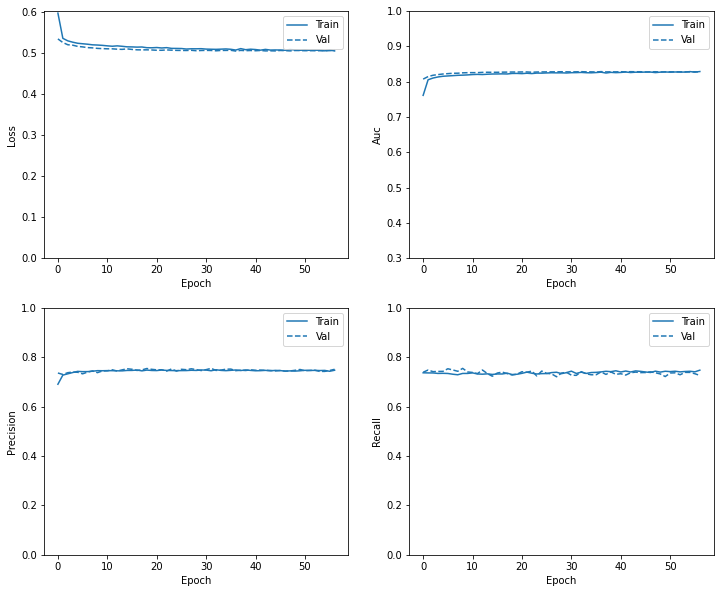

In [83]:
plot_metrics(resampled_history)

In [84]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.5022625923156738
tp :  4166.0
fp :  2857.0
tn :  8890.0
fn :  1552.0
accuracy :  0.7475522756576538
precision :  0.593193769454956
recall :  0.7285764217376709
auc :  0.8272337913513184

(True Negatives):  8890
 (False Positives):  2857
(False Negatives):  1552
 (True Positives):  4166
Total Transactions:  5718


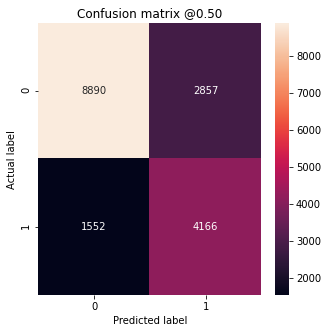

In [85]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

NameError: ignored

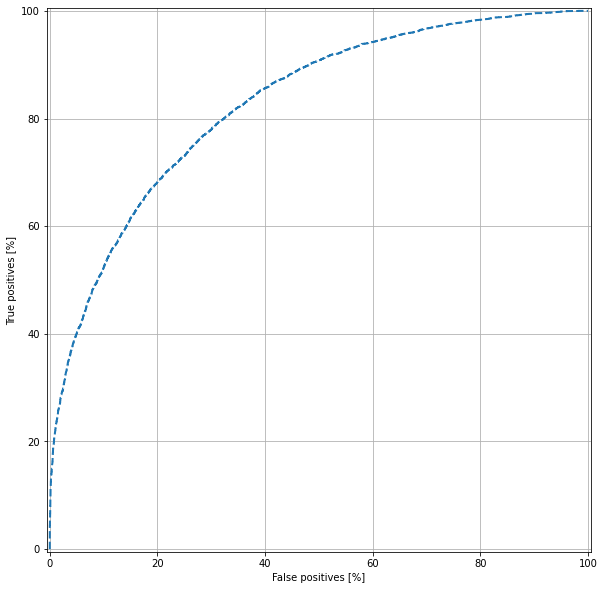

In [86]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# GRU

In [87]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               11.0  ...        60.0        1.0
9    9.0               60.0  ...        19.0        1.0
10  10.0               75.0  ...        18.0        1.0
11  11.0               25.0  ...        53.0        0.0
12  12.0               60.0  ...        37.0        1.0

[5 rows x 14 columns]

In [88]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               12.0  ...        73.0        1.0
9    9.0               82.0  ...         0.0        1.0
10  10.0               64.0  ...        17.0        1.0
11  11.0               14.0  ...        58.0        1.0
12  12.0               73.0  ...         5.0        0.0

[5 rows x 14 columns]

In [90]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [91]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (70035, 13)
shape of test set  set is (17465, 13)
shape of train labels  set is (70035,)
shape of test labels  set is (17465,)


- Remove Correlated filter

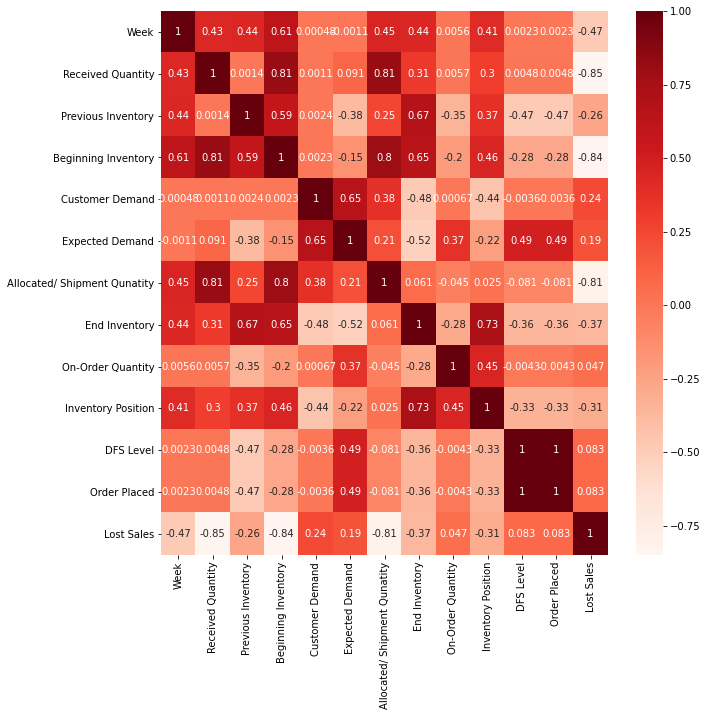

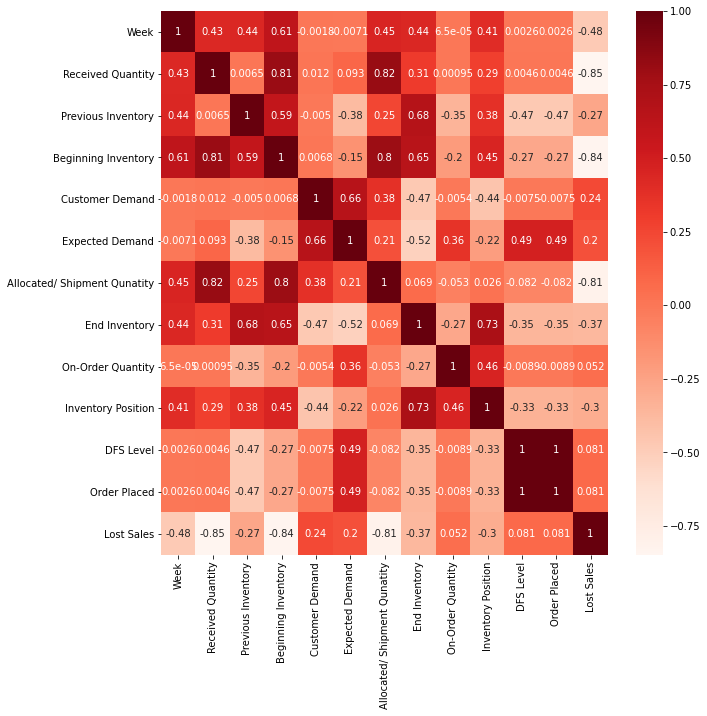

In [92]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [93]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [94]:
X_train=X_train.drop(labels=["Expected Demand","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


In [95]:
X_train.head()

Week  Received Quantity  ...  Order Placed  Lost Sales
8    8.0               11.0  ...          75.0        60.0
9    9.0               60.0  ...          85.0        19.0
10  10.0               75.0  ...          79.0        18.0
11  11.0               25.0  ...          93.0        53.0
12  12.0               60.0  ...          78.0        37.0

[5 rows x 10 columns]

In [96]:
X_train.shape

(70035, 10)

In [97]:
X_test.shape

(17465, 10)

- Correlation


In [98]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 70035
    Positive: 22570 (32.23% of total)



In [99]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 17465
    Positive: 5718 (32.74% of total)



In [100]:
!pip install imbalanced-learn

In [101]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [102]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [103]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 47465, 1: 22570})


Counter({0: 11747, 1: 5718})

OVER and Under Sampling pipeline

OVER SAMPLING

In [104]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.60)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 47465, 1: 28479})


UNDER SAMPLING

In [105]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 28479, 1: 28479})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [106]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
56948  1
56949  1
56950  1
56951  1
56952  1
56953  1
56954  1
56955  1
56956  1
56957  1

In [107]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...           7          8          9
56928  10.894339  65.552831   0.000000  ...   77.552831  84.235847  32.552831
56929  16.000000  77.000000   0.000000  ...   76.434675  93.869350   8.130650
56930  18.694800  78.389600   0.000000  ...   79.694800  79.389600   9.610400
56931  22.299282  66.000000  30.175179  ...   88.299282  66.474462   0.000000
56932  33.355662  85.000000  10.644338  ...   82.677831  80.033492   0.000000
56933   9.000000  70.000000   0.000000  ...   65.000000  76.644085  23.822042
56934  30.873151  88.301479  24.523891  ...  108.301479  64.000000   0.000000
56935  21.446637  82.893274   0.000000  ...   85.446637  78.213451  22.106726
56936  25.836514  70.000000  16.775658  ...   73.775658  81.775658   0.000000
56937  34.338868  82.467774  34.935547  ...   78.725584  70.128905   0.000000
56938  17.679578  71.320422   6.679578  ...   74.679578  82.038733  14.640845
56939  11.000000  32.000000   0.000000  ...   86.693681  81.459478  42.306319
56940  18.990455  82.990455  25.047724  ...   84.028634  61.009545   0.000000
56941  18.498587  83.000000   0.000000  ...   95.749293  71.166196   0.000000
56942  13.152487  82.307919   0.000000  ...   68.384162  71.615838  14.692081
56943  19.000000  79.661065   0.000000  ...   73.338935  86.338935   1.000000
56944   9.000000  76.948893   0.000000  ...   74.025554  93.974446  21.012777
56945  28.778718  79.778718  28.110641  ...  109.000000  53.221282   0.000000
56946  10.000000  78.120373   0.000000  ...   70.120373  88.759254   9.638881
56947  10.578227  60.710887   0.000000  ...   83.578227  77.554433   3.132660
56948  37.547655  74.136914  39.863086  ...   92.863086  71.410742   0.000000
56949   9.531830  73.867043   0.000000  ...   88.265915  95.132957   0.000000
56950  19.307641  78.205094  32.897453  ...  127.743633  53.410188   0.000000
56951  16.663892  67.336108  25.672216  ...   67.344432  62.672216   4.336108
56952  14.943734  66.168798   3.774936  ...   69.943734  76.774936   4.000000
56953  32.000000  75.058866   5.970567  ...   99.970567  70.000000   0.000000
56954  12.852300  63.147700   0.000000  ...   69.704601  68.147700   5.852300
56955  23.178950  74.821050  25.589475  ...   81.410525  71.178950   0.000000
56956  24.000000  60.445362  49.277319  ...  104.759106  63.240894   0.000000
56957  18.170037  67.446692   0.000000  ...   97.829963  85.723346  15.106617

[30 rows x 10 columns]

In [108]:
X_train.shape

(56958, 10)

In [109]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 56958
    Positive: 28479 (50.00% of total)



In [110]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [111]:
train_df.shape

(51262, 10)

In [112]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 51262
    Positive: 25610 (49.96% of total)



In [113]:
a=pd.DataFrame(bool_train_labels)
a.shape

(51262, 1)

In [114]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (51262,)
Validation labels shape: (5696,)
Test labels shape: (17465,)
Training features shape: (51262, 10)
Validation features shape: (5696, 10)
Test features shape: (17465, 10)


In [115]:
from sklearn.decomposition import PCA

In [116]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [117]:
var_ratio

{2: 0.5849793066327361,
 3: 0.7415070019749747,
 4: 0.8558565853959098,
 5: 0.9387104837409831,
 6: 0.9734086125495965,
 7: 0.9999918321034222,
 8: 0.9999963737108368,
 9: 0.9999991371224941}

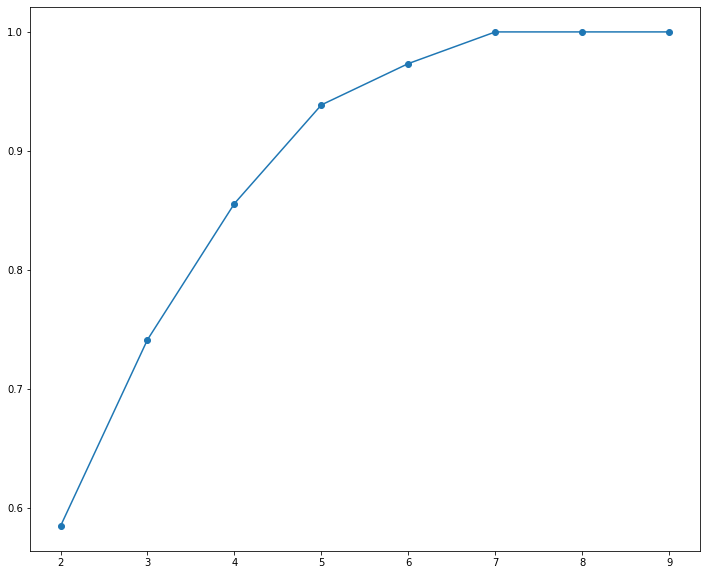

In [118]:
pd.Series(var_ratio).plot(marker="o")

In [119]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[-2.46596976, -1.49168059,  0.61252464, -1.38401791,  0.72621251,
        -1.15277614],
       [-1.26524784, -1.06627881,  1.43035357, -0.96555036, -1.566402  ,
         0.06809369],
       [-0.52516368, -0.27465324, -0.99679678, -0.32419111, -1.09276978,
         0.33487784],
       ...,
       [ 0.69948715, -0.68391179, -1.39116642,  0.34467099,  1.43609368,
         1.0523788 ],
       [ 0.02840828, -1.49725011,  0.65658729, -1.89294508,  0.50132463,
         0.09901764],
       [ 0.47575646, -1.17020406, -1.78977768,  0.1959848 ,  0.61755666,
        -0.05855866]])

In [120]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [121]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0     -2.465970 -1.491681  0.612525 -1.384018  0.726213 -1.152776
1     -1.265248 -1.066279  1.430354 -0.965550 -1.566402  0.068094
2     -0.525164 -0.274653 -0.996797 -0.324191 -1.092770  0.334878
3      0.167823 -1.270630  0.301637 -0.010337  0.222588  0.345923
4     -1.406154 -0.099870 -1.207951 -0.383524 -1.002422  0.120730
...         ...       ...       ...       ...       ...       ...
51257 -1.232871 -1.007891 -0.359582 -0.380609 -0.170286 -0.147793
51258 -4.508769  3.133621  0.559545  0.190693 -0.143864  0.493688
51259  0.699487 -0.683912 -1.391166  0.344671  1.436094  1.052379
51260  0.028408 -1.497250  0.656587 -1.892945  0.501325  0.099018
51261  0.475756 -1.170204 -1.789778  0.195985  0.617557 -0.058559

[51262 rows x 6 columns]

In [122]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [123]:
pos_df.shape

(25610, 6)

In [124]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [125]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [126]:
val_features.shape

(5696, 1, 6)

In [127]:
test_features.shape

(17465, 1, 6)

In [128]:
train_features.shape

(51262, 1, 6)

In [129]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout

In [130]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.GRU(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.GRU(20,activation ="tanh"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [131]:
EPOCHS = 150
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [132]:
model = make_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 30)             3420      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 20)                3120      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.predict(train_features[:10])

array([[0.30430096],
       [0.27733058],
       [0.28346562],
       [0.2945524 ],
       [0.28486916],
       [0.29404992],
       [0.29498002],
       [0.28615296],
       [0.3083536 ],
       [0.35434037]], dtype=float32)

In [134]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7853


In [135]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.00163864])

In [136]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.50589925],
       [0.5106087 ],
       [0.48680073],
       [0.49517998],
       [0.48433208],
       [0.49687988],
       [0.50866574],
       [0.5039686 ],
       [0.51069236],
       [0.6114818 ]], dtype=float32)

In [137]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6959


In [138]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [139]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [140]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [141]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [142]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

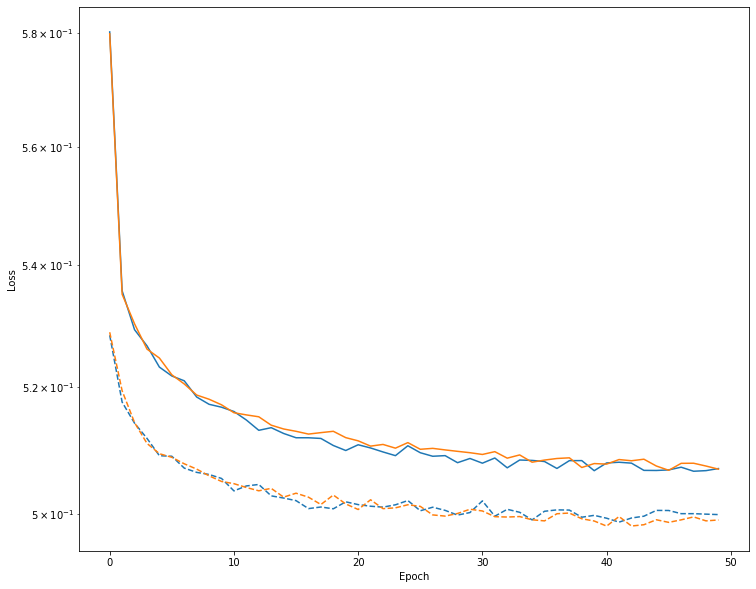

In [143]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [144]:

model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
201/201 [==============================] - 8s 12ms/step - loss: 0.6266 - tp: 11144.7426 - fp: 4635.5248 - tn: 11110.5792 - fn: 4785.9653 - accuracy: 0.7006 - precision: 0.7056 - recall: 0.6951 - auc: 0.7636 - val_loss: 0.5290 - val_tp: 2143.0000 - val_fp: 763.0000 - val_tn: 2064.0000 - val_fn: 726.0000 - val_accuracy: 0.7386 - val_precision: 0.7374 - val_recall: 0.7470 - val_auc: 0.8124
Epoch 2/150
201/201 [==============================] - 1s 6ms/step - loss: 0.5344 - tp: 9639.5990 - fp: 3693.5297 - tn: 9301.9356 - fn: 3345.7475 - accuracy: 0.7297 - precision: 0.7229 - recall: 0.7427 - auc: 0.8072 - val_loss: 0.5180 - val_tp: 2201.0000 - val_fp: 762.0000 - val_tn: 2065.0000 - val_fn: 668.0000 - val_accuracy: 0.7489 - val_precision: 0.7428 - val_recall: 0.7672 - val_auc: 0.8219
Epoch 3/150
201/201 [==============================] - 1s 6ms/step - loss: 0.5280 - tp: 9681.7475 - fp: 3562.9455 - tn: 9423.9851 - fn: 3312.1337 - accuracy: 0.7360 - precision: 0.7324 - recall: 0.74

In [145]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

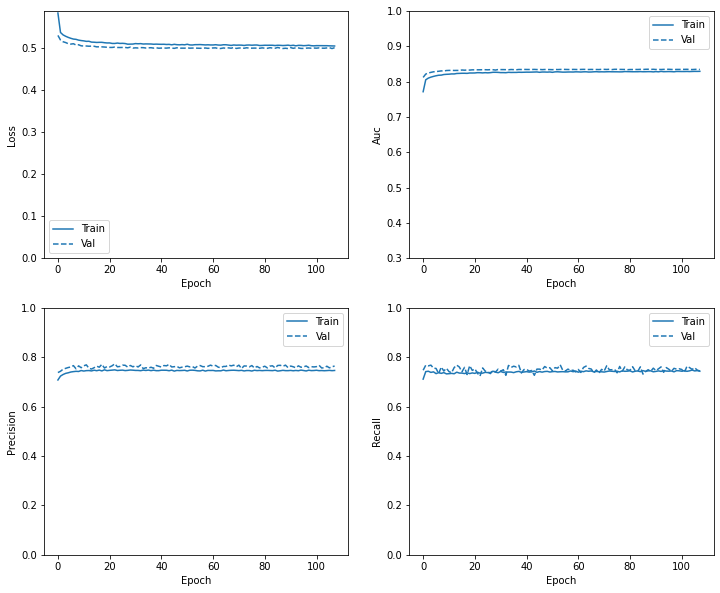

In [146]:
plot_metrics(baseline_history)

In [147]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [148]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.5014069676399231
tp :  4190.0
fp :  2854.0
tn :  8893.0
fn :  1528.0
accuracy :  0.7490981817245483
precision :  0.5948324799537659
recall :  0.7327737212181091
auc :  0.8287389874458313

(True Negatives):  8893
 (False Positives):  2854
(False Negatives):  1528
 (True Positives):  4190
Total Transactions:  5718


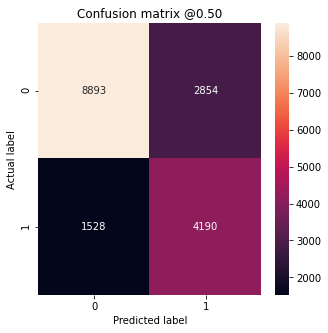

In [149]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# GRU

In [ ]:
test_predictions_baseline

array([[5.82335889e-02],
       [4.40902710e-02],
       [1.61261469e-01],
       ...,
       [4.23731446e-01],
       [4.52414155e-03],
       [1.24913295e-05]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

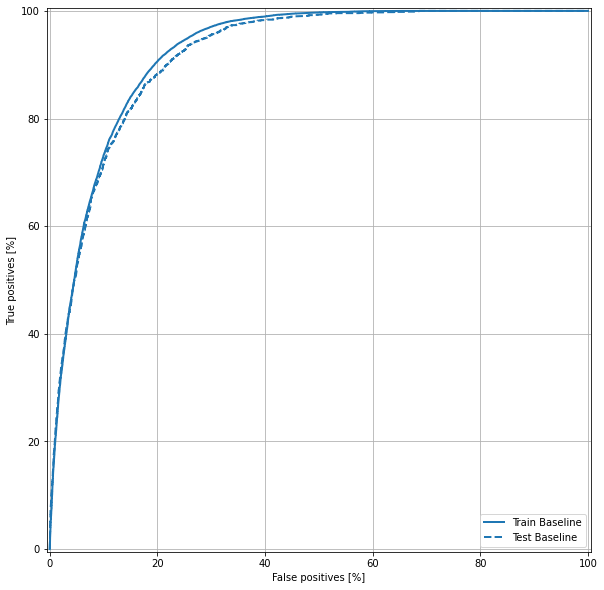

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/170
510/510 [==============================] - 5s 5ms/step - loss: 0.6061 - tp: 13864.7593 - fp: 5879.9922 - tn: 14075.8728 - fn: 6192.8356 - accuracy: 0.6963 - precision: 0.7023 - recall: 0.6850 - auc: 0.7659 - val_loss: 0.5366 - val_tp: 2778.0000 - val_fp: 1036.0000 - val_tn: 2562.0000 - val_fn: 870.0000 - val_accuracy: 0.7370 - val_precision: 0.7284 - val_recall: 0.7615 - val_auc: 0.8058
Epoch 2/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5487 - tp: 12068.2975 - fp: 4777.7730 - tn: 11596.0705 - fn: 4325.3190 - accuracy: 0.7198 - precision: 0.7145 - recall: 0.7350 - auc: 0.7933 - val_loss: 0.5307 - val_tp: 2666.0000 - val_fp: 926.0000 - val_tn: 2672.0000 - val_fn: 982.0000 - val_accuracy: 0.7367 - val_precision: 0.7422 - val_recall: 0.7308 - val_auc: 0.8100
Epoch 3/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5426 - tp: 12040.8924 - fp: 4730.6947 - tn: 11720.9237 - fn: 4274.9491 - accuracy: 0.7250 - precision: 0.7165 - recall: 

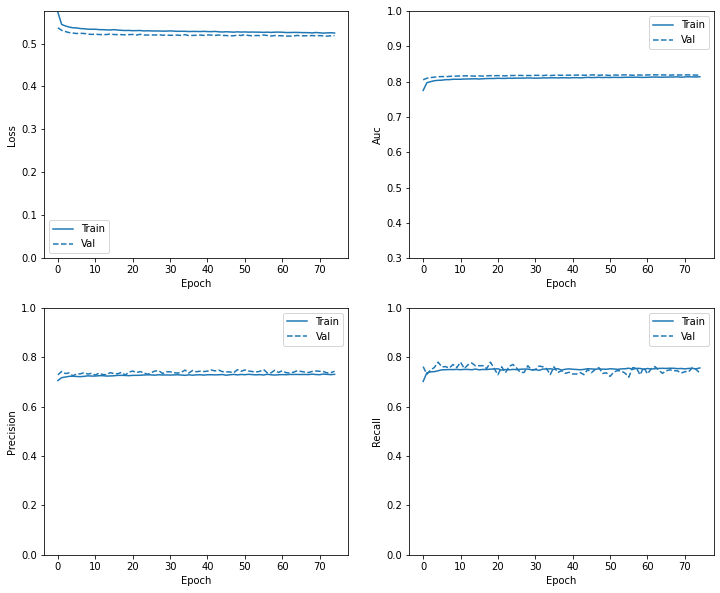

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5184459090232849
tp :  2681.0
fp :  930.0
tn :  2668.0
fn :  967.0
accuracy :  0.7382003664970398
precision :  0.7424536347389221
recall :  0.734923243522644
auc :  0.8197070360183716

(True Negatives):  2668
 (False Positives):  930
(False Negatives):  967
 (True Positives):  2681
Total Transactions:  3648


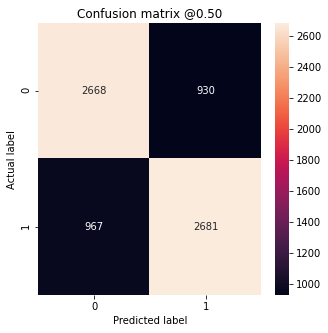

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

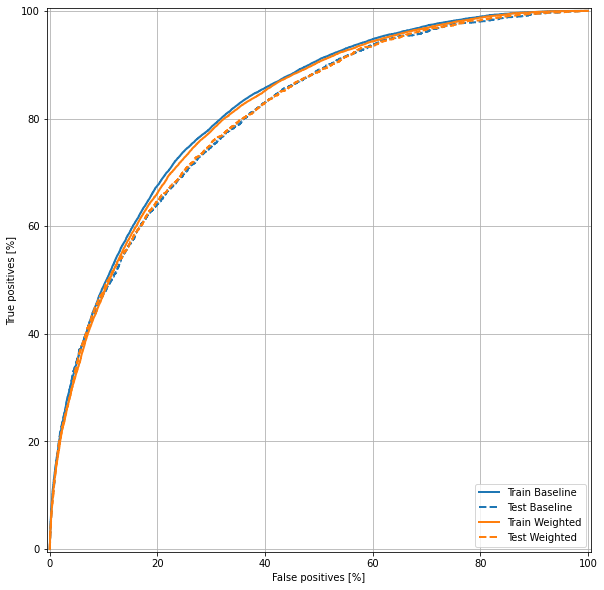

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(32628, 1, 5)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(65256, 1, 5)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[ 1.71830398 -1.13673723 -2.17685057  0.62384352  0.08632702]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 1, 5), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

510.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/170
510/510 [==============================] - 6s 5ms/step - loss: 0.6074 - tp: 14156.6497 - fp: 6440.0117 - tn: 13526.1859 - fn: 5890.9022 - accuracy: 0.6877 - precision: 0.6831 - recall: 0.7048 - auc: 0.7628 - val_loss: 0.5354 - val_tp: 2790.0000 - val_fp: 1051.0000 - val_tn: 2547.0000 - val_fn: 858.0000 - val_accuracy: 0.7365 - val_precision: 0.7264 - val_recall: 0.7648 - val_auc: 0.8054
Epoch 2/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5484 - tp: 11934.6830 - fp: 4756.3014 - tn: 11650.7417 - fn: 4426.0235 - accuracy: 0.7175 - precision: 0.7127 - recall: 0.7268 - auc: 0.7932 - val_loss: 0.5289 - val_tp: 2829.0000 - val_fp: 1054.0000 - val_tn: 2544.0000 - val_fn: 819.0000 - val_accuracy: 0.7415 - val_precision: 0.7286 - val_recall: 0.7755 - val_auc: 0.8106
Epoch 3/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5406 - tp: 12027.2779 - fp: 4643.0528 - tn: 11808.1996 - fn: 4289.2192 - accuracy: 0.7271 - precision: 0.7202 - recall:

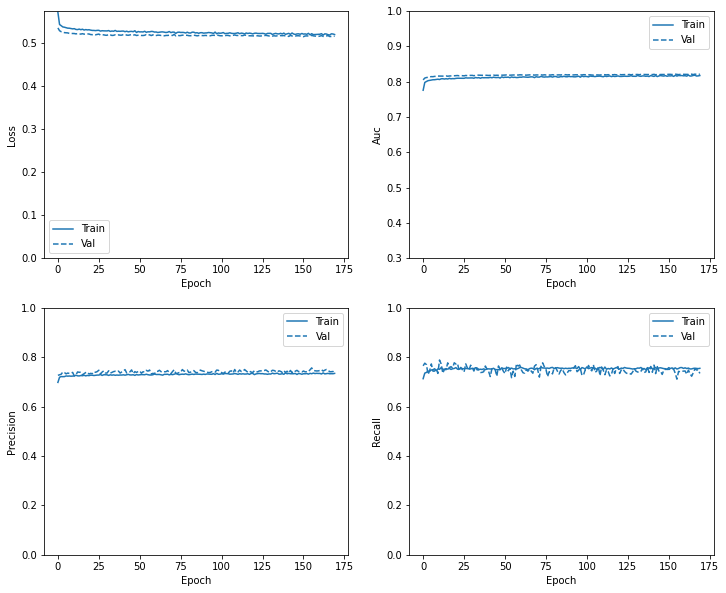

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=2*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/340
20/20 [==============================] - 5s 59ms/step - loss: 0.7008 - tp: 2889.5714 - fp: 1123.3810 - tn: 3173.1429 - fn: 1461.8095 - accuracy: 0.7026 - precision: 0.7211 - recall: 0.6663 - auc: 0.7899 - val_loss: 0.6765 - val_tp: 2654.0000 - val_fp: 1538.0000 - val_tn: 2060.0000 - val_fn: 994.0000 - val_accuracy: 0.6506 - val_precision: 0.6331 - val_recall: 0.7275 - val_auc: 0.7144
Epoch 2/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6712 - tp: 530.3810 - fp: 300.8095 - tn: 375.7619 - fn: 194.9524 - accuracy: 0.6415 - precision: 0.6332 - recall: 0.7234 - auc: 0.6948 - val_loss: 0.6484 - val_tp: 2741.0000 - val_fp: 1530.0000 - val_tn: 2068.0000 - val_fn: 907.0000 - val_accuracy: 0.6637 - val_precision: 0.6418 - val_recall: 0.7514 - val_auc: 0.7430
Epoch 3/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6436 - tp: 509.1905 - fp: 278.0476 - tn: 428.1429 - fn: 186.5238 - accuracy: 0.6618 - precision: 0.6349 - recall: 0.7350 - auc: 0.73

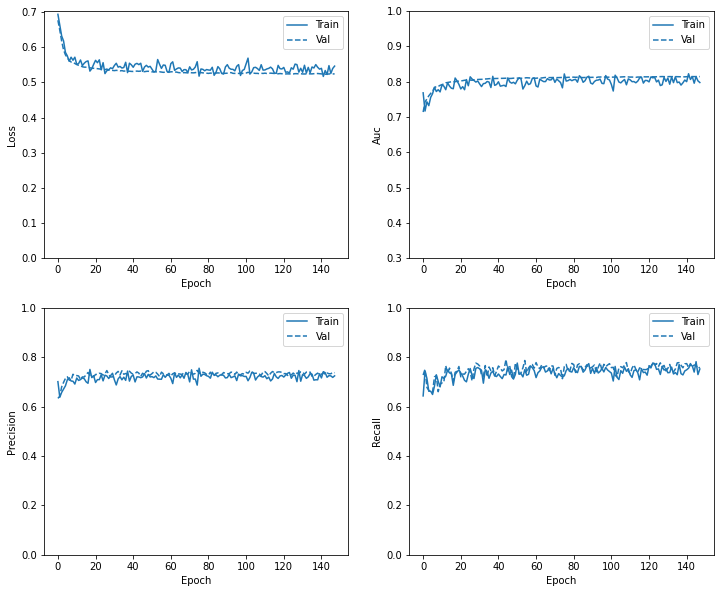

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)


loss :  0.524739682674408
tp :  2775.0
fp :  998.0
tn :  2600.0
fn :  873.0
accuracy :  0.7417885661125183
precision :  0.735489010810852
recall :  0.7606908082962036
auc :  0.8148261308670044

(True Negatives):  2600
 (False Positives):  998
(False Negatives):  873
 (True Positives):  2775
Total Transactions:  3648


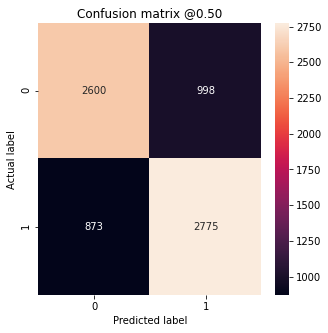

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

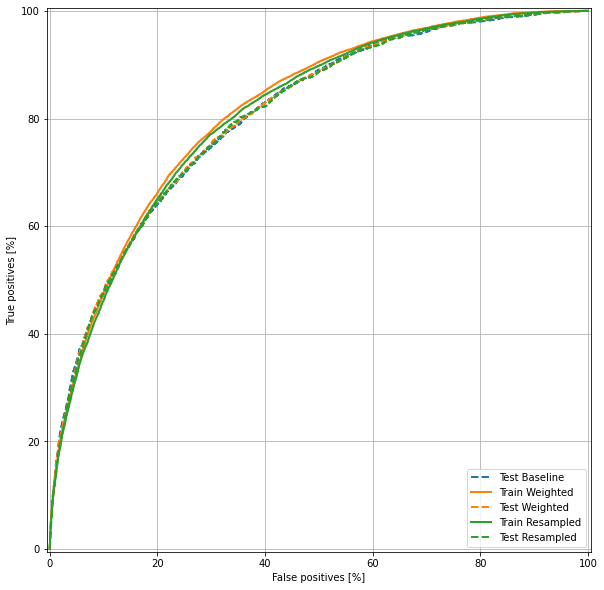

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# 1D CONV

In [150]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               11.0  ...        60.0        1.0
9    9.0               60.0  ...        19.0        1.0
10  10.0               75.0  ...        18.0        1.0
11  11.0               25.0  ...        53.0        0.0
12  12.0               60.0  ...        37.0        1.0

[5 rows x 14 columns]

In [151]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               12.0  ...        73.0        1.0
9    9.0               82.0  ...         0.0        1.0
10  10.0               64.0  ...        17.0        1.0
11  11.0               14.0  ...        58.0        1.0
12  12.0               73.0  ...         5.0        0.0

[5 rows x 14 columns]

In [152]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [153]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (70035, 13)
shape of test set  set is (17465, 13)
shape of train labels  set is (70035,)
shape of test labels  set is (17465,)


- Remove Correlated filter

In [154]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [155]:
X_train=X_train.drop(labels=["Expected Demand","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


In [156]:
X_train.head()

Week  Received Quantity  ...  Order Placed  Lost Sales
8    8.0               11.0  ...          75.0        60.0
9    9.0               60.0  ...          85.0        19.0
10  10.0               75.0  ...          79.0        18.0
11  11.0               25.0  ...          93.0        53.0
12  12.0               60.0  ...          78.0        37.0

[5 rows x 10 columns]

In [157]:
X_train.shape

(70035, 10)

In [158]:
X_test.shape

(17465, 10)

- Correlation


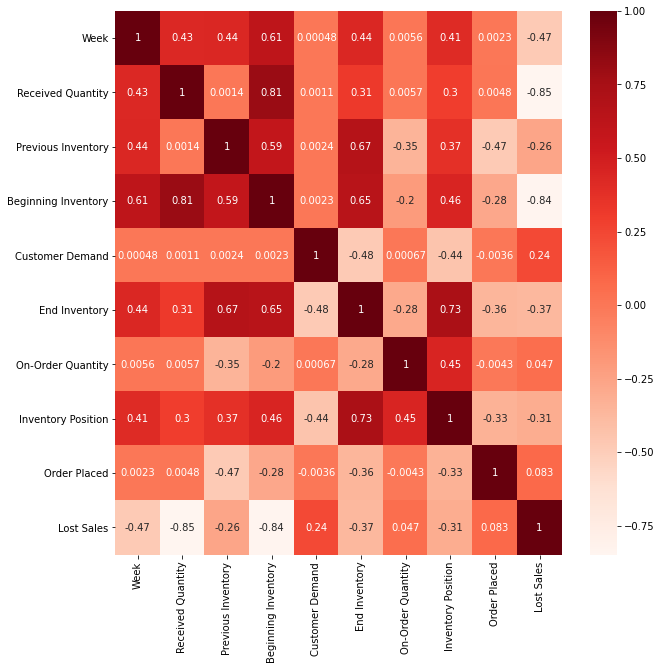

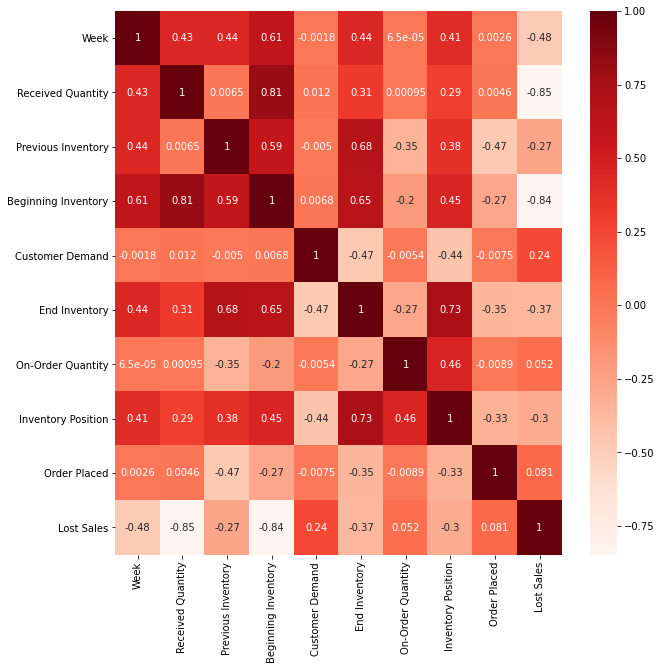

In [159]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [160]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 70035
    Positive: 22570 (32.23% of total)



In [161]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 17465
    Positive: 22570 (32.23% of total)



In [162]:
!pip install imbalanced-learn

In [163]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [164]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [165]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 47465, 1: 22570})


Counter({0: 11747, 1: 5718})

OVER and Under Sampling pipeline

OVER SAMPLING

In [166]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.40)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

UNDER SAMPLING

In [167]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 22570, 1: 22570})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [168]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
45130  1
45131  1
45132  1
45133  1
45134  1
45135  1
45136  1
45137  1
45138  1
45139  1

In [169]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0      1     2      3      4     5      6      7     8     9
45110  15.0   74.0   0.0   74.0   80.0   0.0   84.0   84.0  96.0   6.0
45111  16.0   80.0   0.0   80.0   69.0  11.0   96.0  107.0  80.0   0.0
45112  17.0   60.0  11.0   71.0   78.0   0.0   80.0   80.0  69.0   7.0
45113  18.0   74.0   0.0   74.0   75.0   0.0   69.0   69.0  78.0   1.0
45114  20.0   78.0   0.0   78.0   83.0   0.0   75.0   75.0  70.0   5.0
45115  22.0   70.0  16.0   86.0   92.0   0.0   83.0   83.0  59.0   6.0
45116  37.0   82.0  21.0  103.0   98.0   5.0   77.0   82.0  64.0   0.0
45117  38.0   77.0   5.0   82.0   71.0  11.0   64.0   75.0  98.0   0.0
45118  39.0   64.0  11.0   75.0   86.0   0.0   98.0   98.0  71.0  11.0
45119  40.0   98.0   0.0   98.0  101.0   0.0   71.0   71.0  86.0   3.0
45120   8.0   24.0   0.0   24.0   87.0   0.0  103.0  103.0  85.0  63.0
45121   9.0   74.0   0.0   74.0   91.0   0.0   85.0   85.0  87.0  17.0
45122  10.0   62.0   0.0   62.0   81.0   0.0   87.0   87.0  91.0  19.0
45123  11.0   24.0   0.0   24.0   83.0   0.0   91.0   91.0  81.0  59.0
45124  20.0   85.0  11.0   96.0   83.0  13.0   78.0   91.0  67.0   0.0
45125  21.0   78.0  13.0   91.0   81.0  10.0   67.0   77.0  83.0   0.0
45126  22.0   67.0  10.0   77.0   80.0   0.0   83.0   83.0  81.0   3.0
45127  23.0   83.0   0.0   83.0   93.0   0.0   81.0   81.0  80.0  10.0
45128  24.0   81.0   0.0   81.0   91.0   0.0   80.0   80.0  93.0  10.0
45129  39.0   66.0  33.0   99.0   75.0  24.0   74.0   98.0  81.0   0.0
45130  40.0   74.0  24.0   98.0   91.0   7.0   81.0   88.0  75.0   0.0
45131   8.0    0.0   0.0    0.0   79.0   0.0   90.0   90.0  78.0  79.0
45132   9.0   90.0   0.0   90.0   84.0   6.0   78.0   84.0  79.0   0.0
45133  10.0   70.0   6.0   76.0   81.0   0.0   79.0   79.0  84.0   5.0
45134  12.0   84.0   0.0   84.0   88.0   0.0   81.0   81.0  95.0   4.0
45135  14.0   82.0   0.0   82.0   84.0   0.0   88.0   88.0  81.0   2.0
45136  22.0   71.0  40.0  111.0   89.0  22.0   54.0   76.0  87.0   0.0
45137  27.0  100.0  17.0  117.0   78.0  39.0   65.0  104.0  80.0   0.0
45138  28.0   65.0  39.0  104.0   95.0   9.0   80.0   89.0  78.0   0.0
45139  35.0   71.0  56.0  127.0   82.0  45.0   60.0  105.0  77.0   0.0

In [170]:
X_train.shape

(45140, 10)

In [171]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 45140
    Positive: 22570 (50.00% of total)



In [172]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.25)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [173]:
train_df.shape

(33855, 10)

In [174]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 33855
    Positive: 16896 (49.91% of total)



In [175]:
a=pd.DataFrame(bool_train_labels)
a.shape

(33855, 1)

In [176]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (33855,)
Validation labels shape: (11285,)
Test labels shape: (17465,)
Training features shape: (33855, 10)
Validation features shape: (11285, 10)
Test features shape: (17465, 10)


In [177]:
from sklearn.decomposition import PCA

In [178]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [179]:
var_ratio

{2: 0.5835667829892288,
 3: 0.7406006633404105,
 4: 0.8552691453491208,
 5: 0.9379665477047359,
 6: 0.9728801089977704,
 7: 0.9999873199898017,
 8: 0.9999950407809005,
 9: 0.9999987102927006}

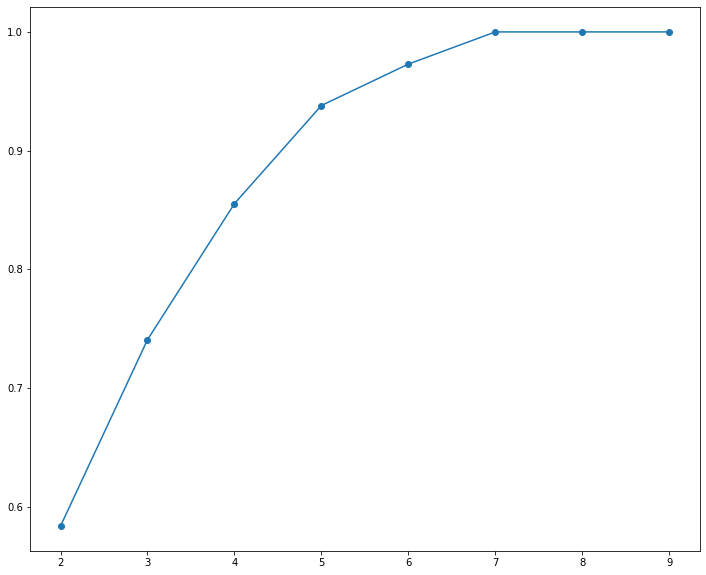

In [180]:
pd.Series(var_ratio).plot(marker="o")

In [181]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[-1.50454961, -0.91832612, -0.06193483,  0.21620617, -0.16988835,
        -0.44886662],
       [-0.33924054, -0.34784932,  0.17156015, -0.23374695,  0.63723607,
         0.4831236 ],
       [ 1.93684788,  0.84582586,  0.01064866, -0.63210083, -0.06191606,
         0.25771159],
       ...,
       [ 0.97609273, -1.83809981,  0.44334528,  1.23217504, -1.20838758,
        -0.13437793],
       [-0.96391422, -0.35786812,  0.06834235,  1.37110342,  1.06699243,
        -0.18697719],
       [-0.60570645, -0.62131655,  0.56200179, -1.00444389,  0.02633816,
         1.09028349]])

In [182]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [183]:
val_features

array([[-6.98095521e-01, -5.69214036e-01, -1.37550151e+00,
        -1.97980100e+00,  1.33603233e-01, -1.88771882e-01],
       [-3.58073041e-01, -3.96079494e-01,  1.79310610e+00,
        -1.65456487e-01,  1.64395855e+00,  2.15788517e-01],
       [ 4.67145813e+00,  1.89245045e+00,  8.63414302e-01,
         6.02102635e-01, -3.95472870e-01, -1.25867243e+00],
       ...,
       [-1.15746933e+00, -4.96580717e-02, -1.36799717e+00,
         9.04831159e-01,  9.59644099e-01, -1.70428858e-01],
       [-1.45218188e+00,  3.58561861e-02, -1.12830089e-01,
         1.25478153e+00, -3.22356078e-01, -1.02675893e-01],
       [-8.84819540e-01, -4.38151899e-02, -3.91662609e-03,
         6.42956586e-01,  2.31717834e+00,  2.74681422e-01]])

In [184]:
test_features

array([[-4.92160668e+00,  3.61250349e+00, -2.73948657e-01,
         1.57949368e+00, -1.48192000e-01, -2.83659900e-01],
       [-7.20135108e-01, -9.85953620e-01,  8.74372858e-01,
        -2.11207740e+00,  1.14682348e+00, -4.54070834e-01],
       [-1.41808326e+00,  2.53786431e-01, -1.02071305e-03,
         1.26028779e+00,  8.28735080e-01, -3.93384251e-01],
       ...,
       [-8.15759647e-01, -2.39572190e+00,  5.15524315e-01,
         2.61147310e-01, -2.39045300e+00, -3.21790510e-01],
       [-3.71923158e-01, -1.57556369e+00, -1.94653069e+00,
         1.73403854e+00, -2.45994981e+00, -3.01231450e-01],
       [ 2.38554787e+00, -1.21720233e+00, -2.78752343e+00,
         2.18985742e-01, -1.71194593e+00, -9.58824434e-01]])

In [185]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0     -1.504550 -0.918326 -0.061935  0.216206 -0.169888 -0.448867
1     -0.339241 -0.347849  0.171560 -0.233747  0.637236  0.483124
2      1.936848  0.845826  0.010649 -0.632101 -0.061916  0.257712
3      2.210954  0.650292 -0.410673 -0.765945 -0.289986  0.300575
4     -0.900510 -0.556882 -1.252723  1.079256  0.717785 -0.397480
...         ...       ...       ...       ...       ...       ...
33850  0.885360 -0.600113 -1.703976  1.773292 -0.903380  0.588835
33851  2.863593  1.586386  1.160378 -0.993356 -0.384742  0.343253
33852  0.976093 -1.838100  0.443345  1.232175 -1.208388 -0.134378
33853 -0.963914 -0.357868  0.068342  1.371103  1.066992 -0.186977
33854 -0.605706 -0.621317  0.562002 -1.004444  0.026338  1.090283

[33855 rows x 6 columns]

In [186]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [187]:
pos_df.shape

(16896, 6)

In [188]:
test_features.shape

(17465, 6)

In [189]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))

val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [190]:
train_features = train_features.reshape(train_features.shape[0],train_features.shape[2],1)
test_features = test_features.reshape(test_features.shape[0],test_features.shape[2],1)
val_features = val_features.reshape(val_features.shape[0],val_features.shape[2],1)

In [191]:
import keras 
from keras.models import Model 
from keras.models import Sequential
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [192]:
model = Sequential()
input_shape=(train_features.shape[1], 1)
model.add(Conv1D(64, kernel_size=2,padding = "same",activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = "same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))

model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 64)             192       
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 64)             256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)              

In [193]:
input_shape=(train_features.shape[1], 1)

In [194]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      Conv1D(64, kernel_size=2,padding = "same",activation="relu", input_shape=input_shape),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Conv1D(64,kernel_size=3,padding = "same", activation="relu"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation="tanh"),
      Dropout(0.2),
      Dense(32, activation="tanh"),
      Dropout(0.2),
      Dense(16, activation="relu"),
      Dropout(0.2),

#       model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(64, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation="relu"))

# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))
# model.summary()
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(6,activation="relu"),
#       keras.layers.Dense(4,activation="relu"),
#       keras.layers.Dense(2,activation="sigmoid"),
#       keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [195]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [196]:
model = make_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 64)             192       
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 64)             256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
batch_normalization_3 (Batch (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)              

In [197]:
model.predict(train_features[:10])

array([[0.44377792],
       [0.45665795],
       [0.45790923],
       [0.4636364 ],
       [0.46811458],
       [0.43286252],
       [0.42768368],
       [0.46086228],
       [0.4340899 ],
       [0.42597148]], dtype=float32)

In [198]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7095


In [199]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.00372176])

In [200]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.52497506],
       [0.5146607 ],
       [0.5504785 ],
       [0.5607895 ],
       [0.5402266 ],
       [0.60613024],
       [0.5367788 ],
       [0.58851886],
       [0.5314851 ],
       [0.52758926]], dtype=float32)

In [201]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7040


In [202]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [203]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [204]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [205]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [206]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

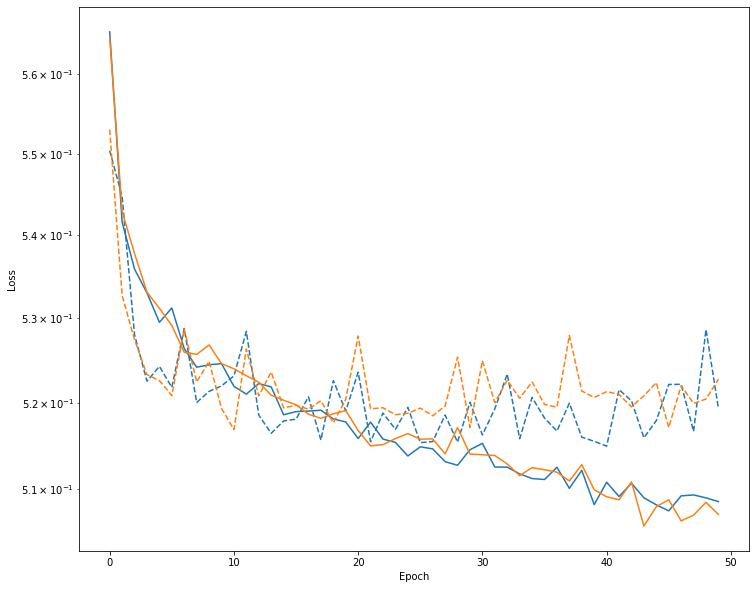

In [207]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [208]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/200
133/133 [==============================] - 5s 20ms/step - loss: 0.5892 - tp: 10271.8657 - fp: 4018.9552 - tn: 10228.1642 - fn: 4041.2239 - accuracy: 0.7180 - precision: 0.7186 - recall: 0.7190 - auc: 0.7921 - val_loss: 0.5623 - val_tp: 3910.0000 - val_fp: 1429.0000 - val_tn: 4182.0000 - val_fn: 1764.0000 - val_accuracy: 0.7171 - val_precision: 0.7323 - val_recall: 0.6891 - val_auc: 0.7961
Epoch 2/200
133/133 [==============================] - 2s 13ms/step - loss: 0.5388 - tp: 6280.2313 - fp: 2235.4179 - tn: 6415.3806 - fn: 2344.1791 - accuracy: 0.7366 - precision: 0.7401 - recall: 0.7300 - auc: 0.8063 - val_loss: 0.5482 - val_tp: 3475.0000 - val_fp: 926.0000 - val_tn: 4685.0000 - val_fn: 2199.0000 - val_accuracy: 0.7231 - val_precision: 0.7896 - val_recall: 0.6124 - val_auc: 0.8126
Epoch 3/200
133/133 [==============================] - 2s 13ms/step - loss: 0.5322 - tp: 6188.6045 - fp: 2161.3284 - tn: 6520.3881 - fn: 2404.8881 - accuracy: 0.7352 - precision: 0.7404 - recall:

In [209]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

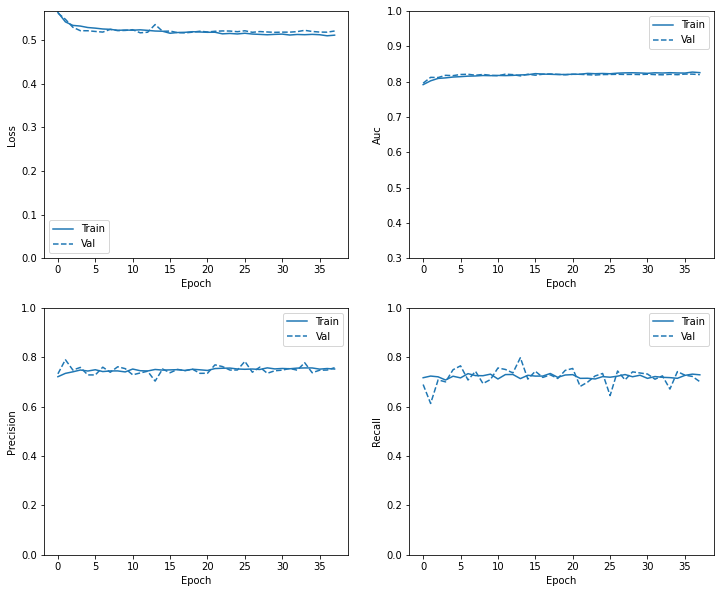

In [210]:
plot_metrics(baseline_history)

In [211]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [212]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.5226178765296936
tp :  4130.0
fp :  2873.0
tn :  8874.0
fn :  1588.0
accuracy :  0.7445748448371887
precision :  0.5897472500801086
recall :  0.7222805023193359
auc :  0.8224477767944336

(True Negatives):  8874
 (False Positives):  2873
(False Negatives):  1588
 (True Positives):  4130
Total Transactions:  5718


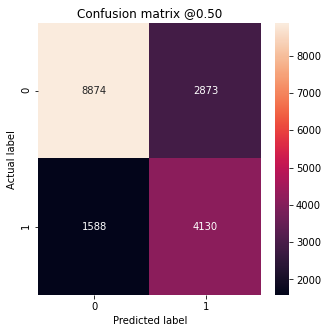

In [213]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# CONV 1D

In [ ]:
test_predictions_baseline

array([[0.80094063],
       [0.96012044],
       [0.95080477],
       ...,
       [0.21368605],
       [0.25198382],
       [0.15019506]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

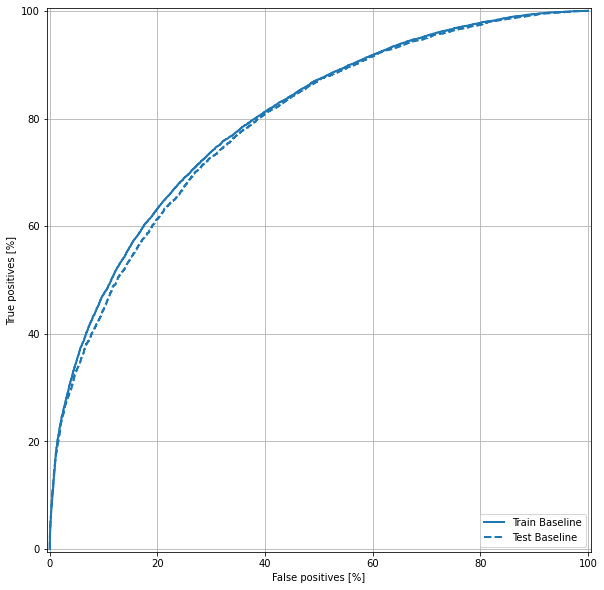

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/300
531/531 [==============================] - 8s 10ms/step - loss: 0.6911 - tp: 19345.9962 - fp: 10184.0883 - tn: 18241.9981 - fn: 8981.5113 - accuracy: 0.6669 - precision: 0.6583 - recall: 0.6902 - auc: 0.7391 - val_loss: 0.5689 - val_tp: 8803.0000 - val_fp: 4349.0000 - val_tn: 7070.0000 - val_fn: 2420.0000 - val_accuracy: 0.7010 - val_precision: 0.6693 - val_recall: 0.7844 - val_auc: 0.7772
Epoch 2/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5930 - tp: 12254.1692 - fp: 5807.2820 - tn: 11185.0019 - fn: 4865.1410 - accuracy: 0.6857 - precision: 0.6764 - recall: 0.7155 - auc: 0.7521 - val_loss: 0.5475 - val_tp: 8549.0000 - val_fp: 3578.0000 - val_tn: 7841.0000 - val_fn: 2674.0000 - val_accuracy: 0.7239 - val_precision: 0.7050 - val_recall: 0.7617 - val_auc: 0.7963
Epoch 3/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5774 - tp: 12434.4530 - fp: 5574.5883 - tn: 11464.8853 - fn: 4637.6673 - accuracy: 0.6994 - precision: 0.6898 - rec

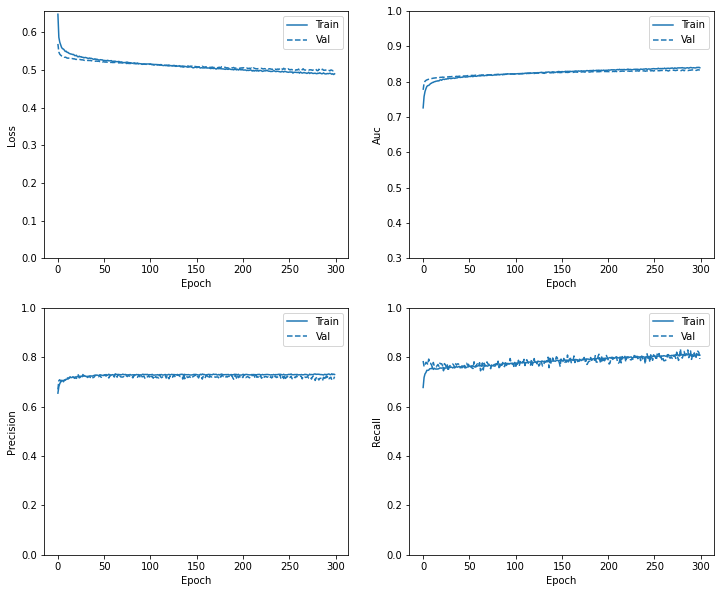

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.4981033205986023
tp :  8896.0
fp :  3444.0
tn :  7975.0
fn :  2327.0
accuracy :  0.7451196908950806
precision :  0.7209076285362244
recall :  0.7926579117774963
auc :  0.8337280750274658

(True Negatives):  7975
 (False Positives):  3444
(False Negatives):  2327
 (True Positives):  8896
Total Transactions:  11223


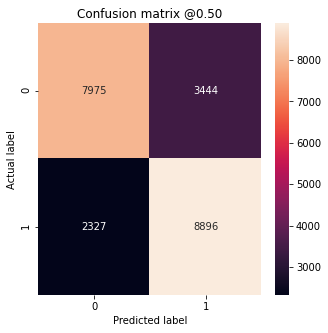

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

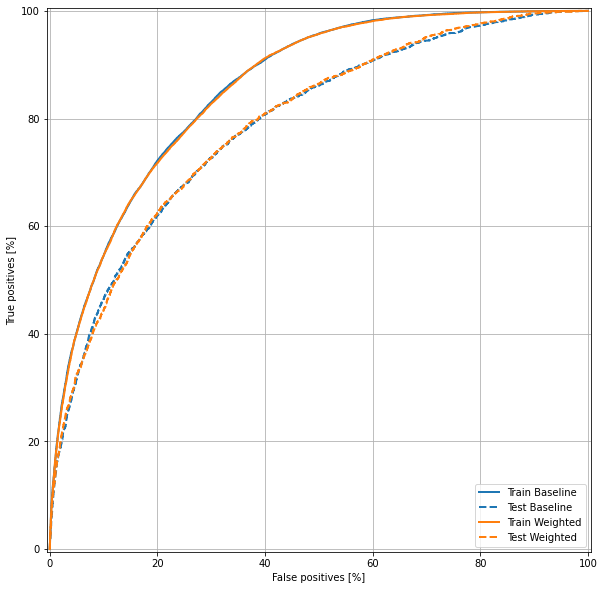

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(33864, 6, 1)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(67728, 6, 1)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[-1.41463932]
 [-1.03407157]
 [-0.09692102]
 [ 0.93895215]
 [-0.24508446]
 [ 0.11068057]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 6, 1), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5546875


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

530.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/300
530/530 [==============================] - 8s 11ms/step - loss: 0.6947 - tp: 11682.1356 - fp: 10759.2222 - tn: 21390.7797 - fn: 7680.6215 - accuracy: 0.6443 - precision: 0.4883 - recall: 0.5927 - auc: 0.6998 - val_loss: 0.5705 - val_tp: 8869.0000 - val_fp: 4500.0000 - val_tn: 6919.0000 - val_fn: 2354.0000 - val_accuracy: 0.6973 - val_precision: 0.6634 - val_recall: 0.7903 - val_auc: 0.7745
Epoch 2/300
530/530 [==============================] - 5s 9ms/step - loss: 0.5924 - tp: 12275.5367 - fp: 5872.9115 - tn: 11091.1488 - fn: 4808.1620 - accuracy: 0.6860 - precision: 0.6778 - recall: 0.7194 - auc: 0.7520 - val_loss: 0.5478 - val_tp: 8535.0000 - val_fp: 3609.0000 - val_tn: 7810.0000 - val_fn: 2688.0000 - val_accuracy: 0.7219 - val_precision: 0.7028 - val_recall: 0.7605 - val_auc: 0.7955
Epoch 3/300
530/530 [==============================] - 4s 8ms/step - loss: 0.5757 - tp: 12430.2863 - fp: 5627.9831 - tn: 11375.9416 - fn: 4613.5480 - accuracy: 0.6988 - precision: 0.6896 - rec

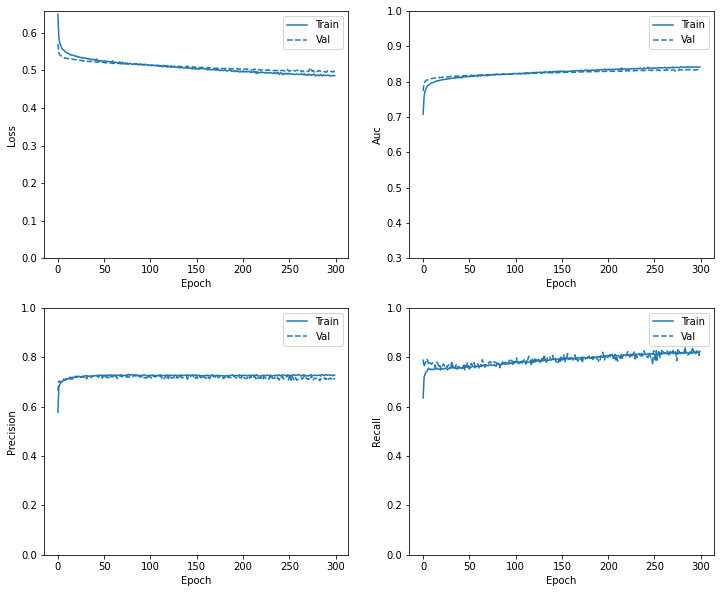

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/600
20/20 [==============================] - 4s 79ms/step - loss: 0.8108 - tp: 9618.0476 - fp: 4133.4286 - tn: 7994.5238 - fn: 2297.9048 - accuracy: 0.7328 - precision: 0.6995 - recall: 0.8076 - auc: 0.8206 - val_loss: 0.6972 - val_tp: 7965.0000 - val_fp: 8889.0000 - val_tn: 2530.0000 - val_fn: 3258.0000 - val_accuracy: 0.4635 - val_precision: 0.4726 - val_recall: 0.7097 - val_auc: 0.4552
Epoch 2/600
20/20 [==============================] - 1s 32ms/step - loss: 0.7430 - tp: 309.6667 - fp: 288.4762 - tn: 412.7619 - fn: 391.0000 - accuracy: 0.5152 - precision: 0.5273 - recall: 0.4430 - auc: 0.5329 - val_loss: 0.6902 - val_tp: 10341.0000 - val_fp: 10387.0000 - val_tn: 1032.0000 - val_fn: 882.0000 - val_accuracy: 0.5023 - val_precision: 0.4989 - val_recall: 0.9214 - val_auc: 0.5821
Epoch 3/600
20/20 [==============================] - 1s 33ms/step - loss: 0.7482 - tp: 355.6190 - fp: 276.6190 - tn: 386.8095 - fn: 382.8571 - accuracy: 0.5209 - precision: 0.5680 - recall: 0.4702 - auc:

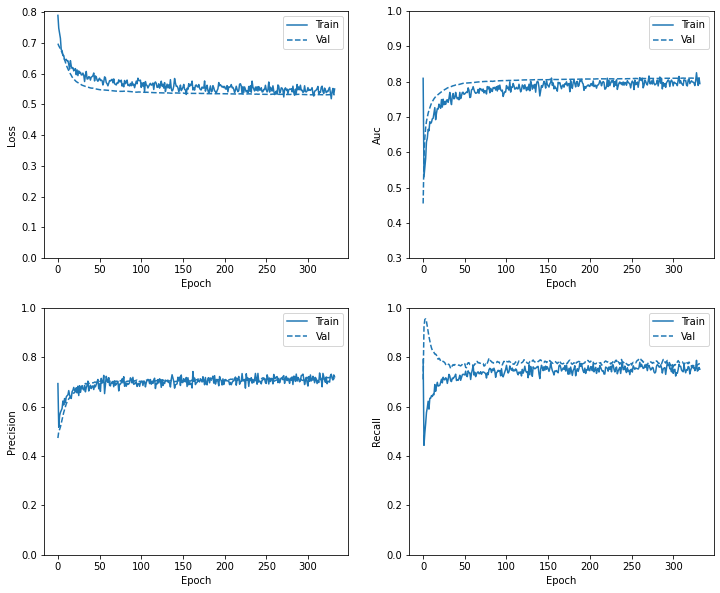

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5311693549156189
tp :  8702.0
fp :  3499.0
tn :  7920.0
fn :  2521.0
accuracy :  0.7341224551200867
precision :  0.7132202386856079
recall :  0.7753720283508301
auc :  0.810551643371582

(True Negatives):  7920
 (False Positives):  3499
(False Negatives):  2521
 (True Positives):  8702
Total Transactions:  11223


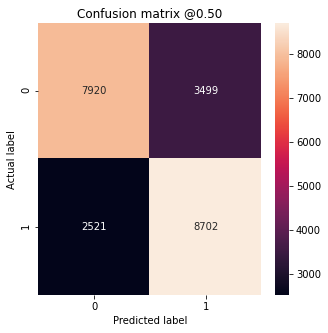

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

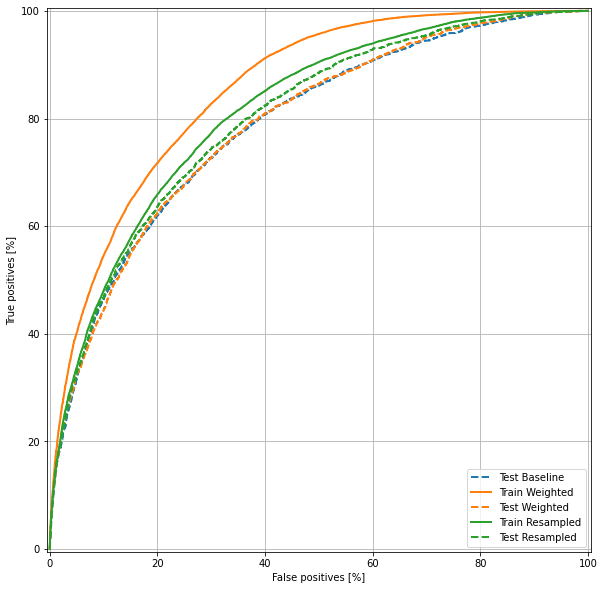

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# DNN


In [214]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               11.0  ...        60.0        1.0
9    9.0               60.0  ...        19.0        1.0
10  10.0               75.0  ...        18.0        1.0
11  11.0               25.0  ...        53.0        0.0
12  12.0               60.0  ...        37.0        1.0

[5 rows x 14 columns]

In [215]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
8    8.0               12.0  ...        73.0        1.0
9    9.0               82.0  ...         0.0        1.0
10  10.0               64.0  ...        17.0        1.0
11  11.0               14.0  ...        58.0        1.0
12  12.0               73.0  ...         5.0        0.0

[5 rows x 14 columns]

In [216]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [217]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (70035, 13)
shape of test set  set is (17465, 13)
shape of train labels  set is (70035,)
shape of test labels  set is (17465,)


- Remove Correlated filter

In [218]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [219]:
X_train=X_train.drop(labels=["Expected Demand","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


In [220]:
X_train.head()

Week  Received Quantity  ...  Order Placed  Lost Sales
8    8.0               11.0  ...          75.0        60.0
9    9.0               60.0  ...          85.0        19.0
10  10.0               75.0  ...          79.0        18.0
11  11.0               25.0  ...          93.0        53.0
12  12.0               60.0  ...          78.0        37.0

[5 rows x 10 columns]

In [221]:
X_train.shape

(70035, 10)

In [222]:
X_test.shape

(17465, 10)

- Correlation


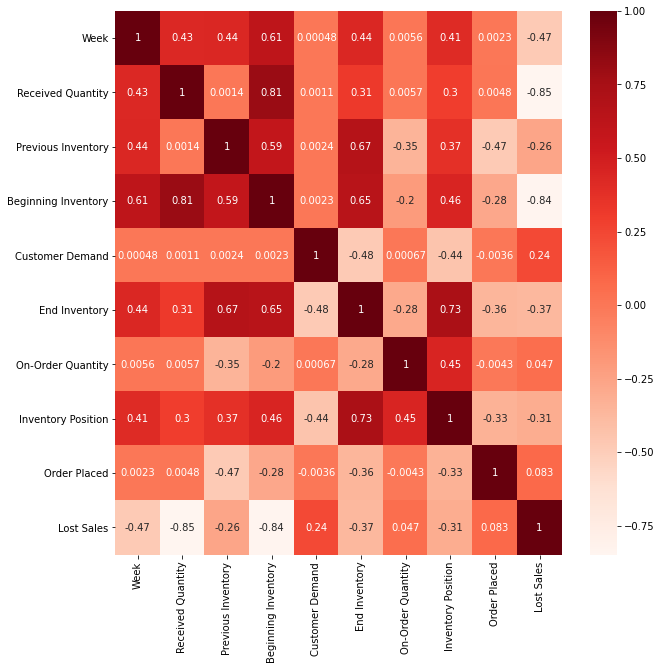

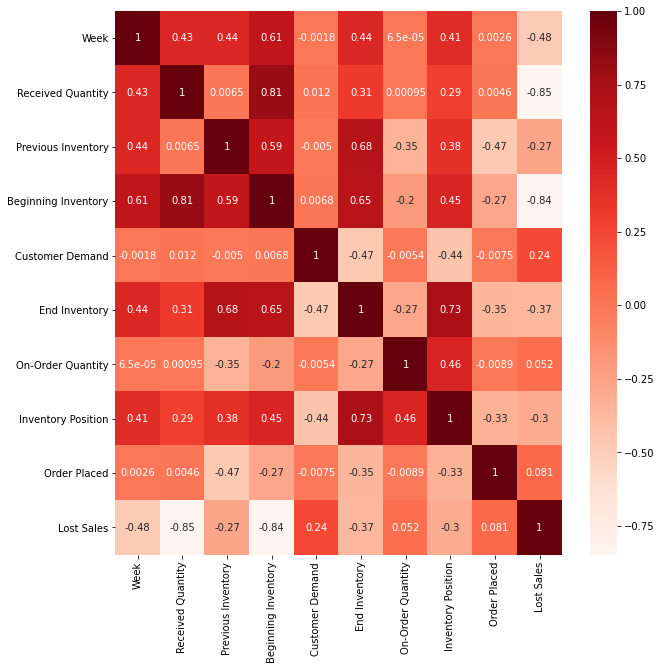

In [223]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [224]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 70035
    Positive: 22570 (32.23% of total)



In [225]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 17465
    Positive: 22570 (32.23% of total)



In [226]:
!pip install imbalanced-learn

In [227]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [228]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [229]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 47465, 1: 22570})


Counter({0: 11747, 1: 5718})

OVER and Under Sampling pipeline

OVER SAMPLING

In [ ]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.7)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 47465, 1: 35598})


UNDER SAMPLING

In [230]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 22570, 1: 22570})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [231]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
45130  1
45131  1
45132  1
45133  1
45134  1
45135  1
45136  1
45137  1
45138  1
45139  1

In [232]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0      1     2      3      4     5      6      7     8     9
45110  15.0   74.0   0.0   74.0   80.0   0.0   84.0   84.0  96.0   6.0
45111  16.0   80.0   0.0   80.0   69.0  11.0   96.0  107.0  80.0   0.0
45112  17.0   60.0  11.0   71.0   78.0   0.0   80.0   80.0  69.0   7.0
45113  18.0   74.0   0.0   74.0   75.0   0.0   69.0   69.0  78.0   1.0
45114  20.0   78.0   0.0   78.0   83.0   0.0   75.0   75.0  70.0   5.0
45115  22.0   70.0  16.0   86.0   92.0   0.0   83.0   83.0  59.0   6.0
45116  37.0   82.0  21.0  103.0   98.0   5.0   77.0   82.0  64.0   0.0
45117  38.0   77.0   5.0   82.0   71.0  11.0   64.0   75.0  98.0   0.0
45118  39.0   64.0  11.0   75.0   86.0   0.0   98.0   98.0  71.0  11.0
45119  40.0   98.0   0.0   98.0  101.0   0.0   71.0   71.0  86.0   3.0
45120   8.0   24.0   0.0   24.0   87.0   0.0  103.0  103.0  85.0  63.0
45121   9.0   74.0   0.0   74.0   91.0   0.0   85.0   85.0  87.0  17.0
45122  10.0   62.0   0.0   62.0   81.0   0.0   87.0   87.0  91.0  19.0
45123  11.0   24.0   0.0   24.0   83.0   0.0   91.0   91.0  81.0  59.0
45124  20.0   85.0  11.0   96.0   83.0  13.0   78.0   91.0  67.0   0.0
45125  21.0   78.0  13.0   91.0   81.0  10.0   67.0   77.0  83.0   0.0
45126  22.0   67.0  10.0   77.0   80.0   0.0   83.0   83.0  81.0   3.0
45127  23.0   83.0   0.0   83.0   93.0   0.0   81.0   81.0  80.0  10.0
45128  24.0   81.0   0.0   81.0   91.0   0.0   80.0   80.0  93.0  10.0
45129  39.0   66.0  33.0   99.0   75.0  24.0   74.0   98.0  81.0   0.0
45130  40.0   74.0  24.0   98.0   91.0   7.0   81.0   88.0  75.0   0.0
45131   8.0    0.0   0.0    0.0   79.0   0.0   90.0   90.0  78.0  79.0
45132   9.0   90.0   0.0   90.0   84.0   6.0   78.0   84.0  79.0   0.0
45133  10.0   70.0   6.0   76.0   81.0   0.0   79.0   79.0  84.0   5.0
45134  12.0   84.0   0.0   84.0   88.0   0.0   81.0   81.0  95.0   4.0
45135  14.0   82.0   0.0   82.0   84.0   0.0   88.0   88.0  81.0   2.0
45136  22.0   71.0  40.0  111.0   89.0  22.0   54.0   76.0  87.0   0.0
45137  27.0  100.0  17.0  117.0   78.0  39.0   65.0  104.0  80.0   0.0
45138  28.0   65.0  39.0  104.0   95.0   9.0   80.0   89.0  78.0   0.0
45139  35.0   71.0  56.0  127.0   82.0  45.0   60.0  105.0  77.0   0.0

In [233]:
X_train.shape

(45140, 10)

In [234]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 45140
    Positive: 22570 (50.00% of total)



In [235]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [236]:
train_df.shape

(40626, 10)

In [237]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 40626
    Positive: 20281 (49.92% of total)



In [238]:
a=pd.DataFrame(bool_train_labels)
a.shape

(40626, 1)

In [239]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (40626,)
Validation labels shape: (4514,)
Test labels shape: (17465,)
Training features shape: (40626, 10)
Validation features shape: (4514, 10)
Test features shape: (17465, 10)


In [240]:
from sklearn.decomposition import PCA

In [241]:
var_ratio={}
for n in range(2,9):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [242]:
var_ratio

{2: 0.5829819804181344,
 3: 0.7407881004709095,
 4: 0.8550649503521528,
 5: 0.9381071730007358,
 6: 0.9731815148493234,
 7: 0.9999891801818677,
 8: 0.9999955130710616}

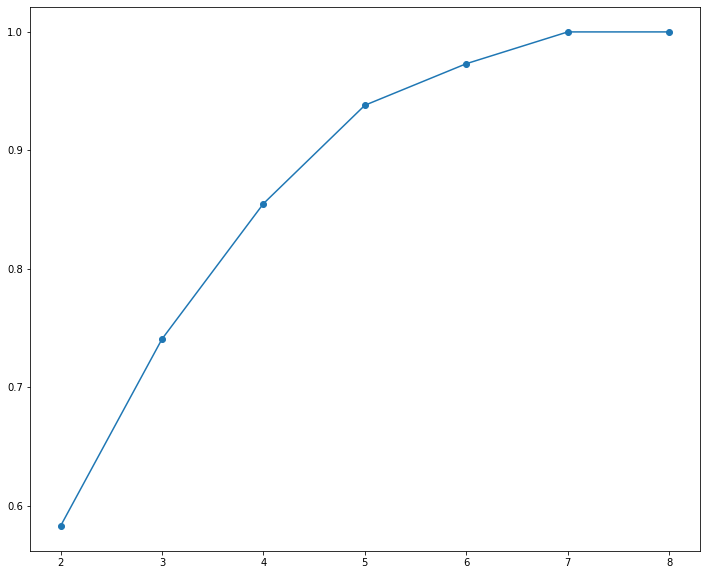

In [243]:
pd.Series(var_ratio).plot(marker="o")

In [244]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[-1.30196661e+00, -1.26109030e+00,  7.23701213e-01,
         1.19588211e+00,  4.06095491e-01, -8.04151435e-01],
       [ 1.27450269e+00,  6.31716418e-01,  1.15589465e+00,
         8.60961929e-01,  5.88217005e-01,  6.37555361e-01],
       [-1.30725386e+00, -1.14908427e+00, -8.16344834e-01,
        -1.25942651e+00,  2.65388686e-01,  1.19390402e-03],
       ...,
       [-6.34271128e-01, -4.14043359e-01,  5.29352008e-01,
         1.90701426e-02, -9.22735181e-01,  5.31752295e-01],
       [ 1.67806054e+00,  6.16601037e-01,  1.29917185e+00,
         3.30271599e-01,  1.24456497e+00,  7.95494649e-01],
       [-4.21492341e-01, -4.53948381e-01,  1.59605214e+00,
         2.50776656e-01, -1.42256258e+00,  7.04040004e-01]])

In [245]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [246]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0     -1.301967 -1.261090  0.723701  1.195882  0.406095 -0.804151
1      1.274503  0.631716  1.155895  0.860962  0.588217  0.637555
2     -1.307254 -1.149084 -0.816345 -1.259427  0.265389  0.001194
3     -0.126627 -0.021169  1.383660  0.839542 -1.011529  0.510939
4      0.366349  0.042374 -0.302378  0.818914 -0.491615  0.444998
...         ...       ...       ...       ...       ...       ...
40621 -0.045467  0.023801 -2.167418  0.461146 -0.644865  0.684915
40622 -5.904275  3.038238  0.529607  0.180718  1.355201 -0.661847
40623 -0.634271 -0.414043  0.529352  0.019070 -0.922735  0.531752
40624  1.678061  0.616601  1.299172  0.330272  1.244565  0.795495
40625 -0.421492 -0.453948  1.596052  0.250777 -1.422563  0.704040

[40626 rows x 6 columns]

In [247]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [248]:
pos_df.shape

(20281, 6)

In [249]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
        11, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(6,activation="relu"),
      keras.layers.Dense(4,activation="tanh"),
      keras.layers.Dense(2,activation="sigmoid"),
      keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.0005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [250]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [251]:
model = make_model()
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 11)                77        
_________________________________________________________________
dropout_35 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 96        
_________________________________________________________________
dropout_36 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_37 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 8)               

In [252]:
model.predict(train_features[:10])

array([[0.23533648],
       [0.23856115],
       [0.23578048],
       [0.2381323 ],
       [0.23825696],
       [0.23615843],
       [0.23859411],
       [0.23762622],
       [0.2370083 ],
       [0.23863432]], dtype=float32)

In [253]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.8548


In [254]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.00315069])

In [255]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.40969366],
       [0.4104687 ],
       [0.41058666],
       [0.40913874],
       [0.41022673],
       [0.40738437],
       [0.4098189 ],
       [0.4095786 ],
       [0.41026157],
       [0.40921593]], dtype=float32)

In [256]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7094


In [257]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [258]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [259]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [260]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [261]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

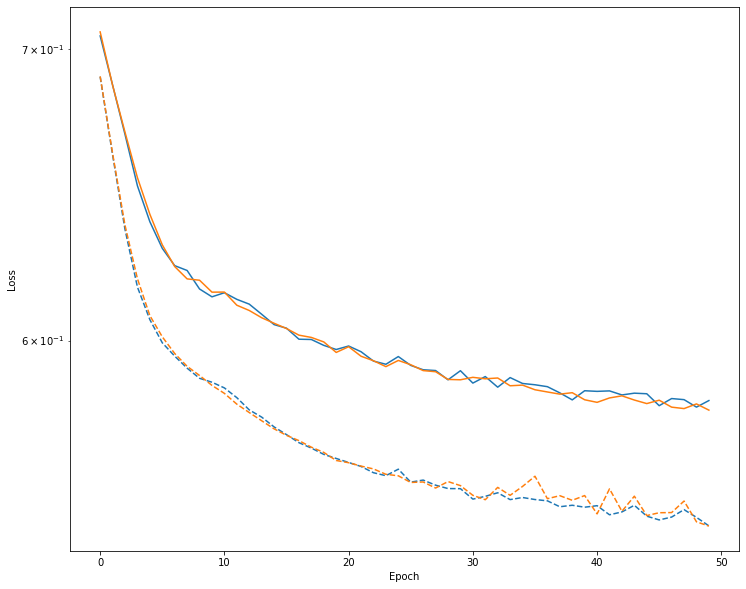

In [262]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [263]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(test_features, test_labels))

Epoch 1/200
159/159 [==============================] - 4s 10ms/step - loss: 0.7116 - tp: 3757.5687 - fp: 2592.1750 - tn: 9939.9688 - fn: 8829.7125 - accuracy: 0.5616 - precision: 0.6074 - recall: 0.3364 - auc: 0.6035 - val_loss: 0.6696 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 11747.0000 - val_fn: 5718.0000 - val_accuracy: 0.6726 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6656
Epoch 2/200
159/159 [==============================] - 1s 4ms/step - loss: 0.6903 - tp: 3521.9625 - fp: 2824.0563 - tn: 7505.8438 - fn: 6753.5625 - accuracy: 0.5258 - precision: 0.5418 - recall: 0.3027 - auc: 0.5570 - val_loss: 0.6514 - val_tp: 4295.0000 - val_fp: 3970.0000 - val_tn: 7777.0000 - val_fn: 1423.0000 - val_accuracy: 0.6912 - val_precision: 0.5197 - val_recall: 0.7511 - val_auc: 0.7605
Epoch 3/200
159/159 [==============================] - 1s 4ms/step - loss: 0.6743 - tp: 6157.6375 - fp: 4171.9750 - tn: 6123.8062 - fn: 4152.0063 - accuracy: 0.5949 - precision: 0.5973 -

In [264]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

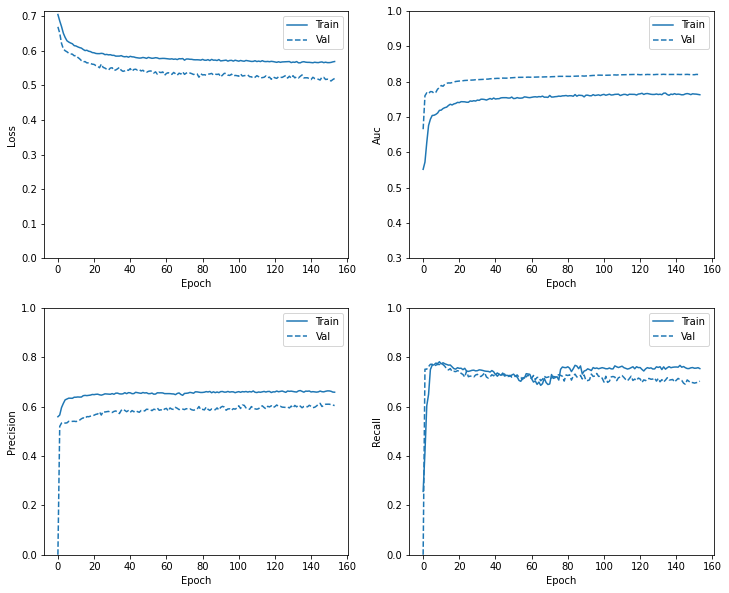

In [265]:
plot_metrics(baseline_history)

In [266]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [267]:
def plot_cm(labels, predictions, p=0.46):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.5215616226196289
tp :  3999.0
fp :  2606.0
tn :  9141.0
fn :  1719.0
accuracy :  0.7523618936538696
precision :  0.6054503917694092
recall :  0.6993703842163086
auc :  0.821274995803833

(True Negatives):  8369
 (False Positives):  3378
(False Negatives):  1353
 (True Positives):  4365
Total Transactions:  5718


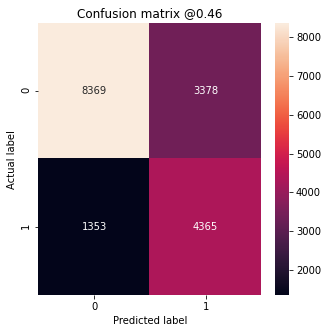

In [268]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# DNN

In [ ]:
test_predictions_baseline

array([[0.18966809],
       [0.4776491 ],
       [0.62751967],
       ...,
       [0.60885984],
       [0.4531247 ],
       [0.40109062]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

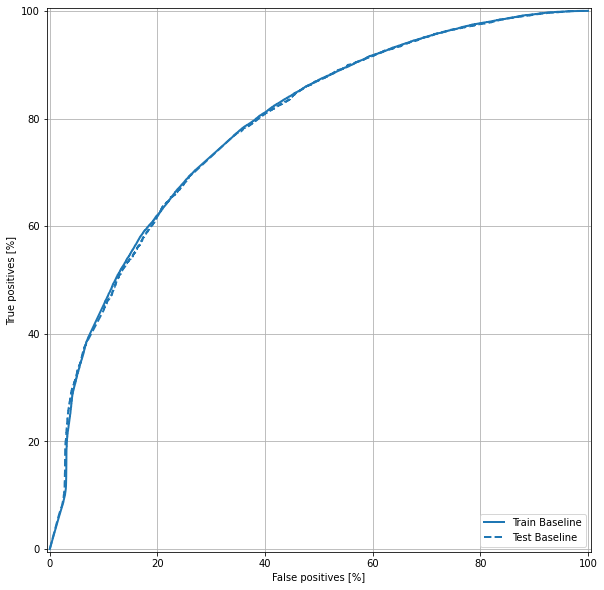

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/200
298/298 [==============================] - 5s 6ms/step - loss: 0.6969 - tp: 16793.1171 - fp: 14113.7324 - tn: 9344.4181 - fn: 6599.4515 - accuracy: 0.5677 - precision: 0.5539 - recall: 0.7235 - auc: 0.6206 - val_loss: 0.6619 - val_tp: 2890.0000 - val_fp: 1327.0000 - val_tn: 2913.0000 - val_fn: 1323.0000 - val_accuracy: 0.6865 - val_precision: 0.6853 - val_recall: 0.6860 - val_auc: 0.7370
Epoch 2/200
298/298 [==============================] - 1s 3ms/step - loss: 0.6704 - tp: 10991.2609 - fp: 7119.2876 - tn: 12035.2809 - fn: 8251.8896 - accuracy: 0.5972 - precision: 0.6053 - recall: 0.5693 - auc: 0.6399 - val_loss: 0.6341 - val_tp: 3157.0000 - val_fp: 1461.0000 - val_tn: 2779.0000 - val_fn: 1056.0000 - val_accuracy: 0.7022 - val_precision: 0.6836 - val_recall: 0.7493 - val_auc: 0.7484
Epoch 3/200
298/298 [==============================] - 1s 4ms/step - loss: 0.6455 - tp: 11657.1873 - fp: 7001.8763 - tn: 12169.8763 - fn: 7568.7793 - accuracy: 0.6200 - precision: 0.6246 - recal

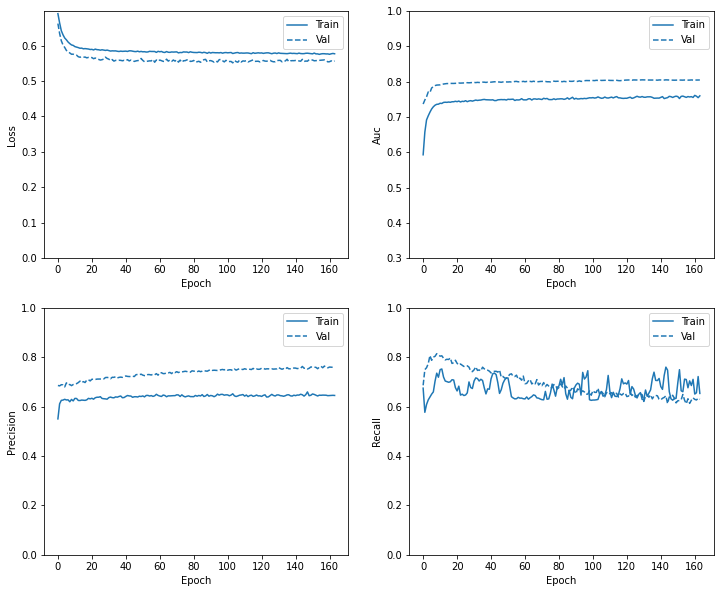

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5556675791740417
tp :  2711.0
fp :  879.0
tn :  3361.0
fn :  1502.0
accuracy :  0.7183248400688171
precision :  0.7551531791687012
recall :  0.6434844732284546
auc :  0.8055305480957031

(True Negatives):  3381
 (False Positives):  859
(False Negatives):  1526
 (True Positives):  2687
Total Transactions:  4213


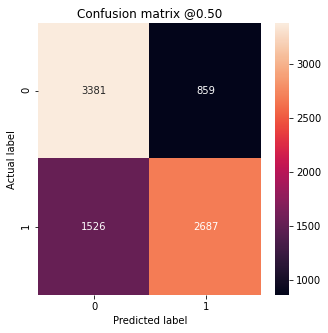

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_baseline)

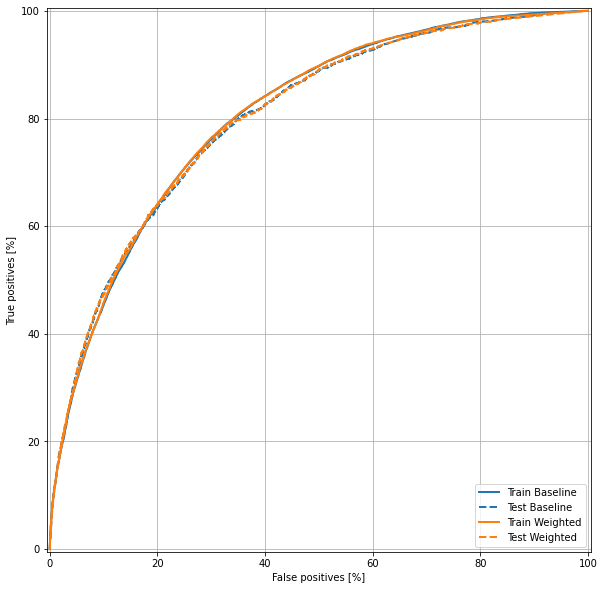

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(38024, 6)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(76048, 6)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 3.54921003 -0.62483459 -2.17698193  0.06235498  1.56902391  0.84214184]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 6), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5078125


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

298.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/200
298/298 [==============================] - 4s 8ms/step - loss: 0.6959 - tp: 16066.3913 - fp: 16828.1940 - tn: 17443.1639 - fn: 5526.3946 - accuracy: 0.6156 - precision: 0.4744 - recall: 0.7470 - auc: 0.6845 - val_loss: 0.6614 - val_tp: 2856.0000 - val_fp: 1273.0000 - val_tn: 2967.0000 - val_fn: 1357.0000 - val_accuracy: 0.6889 - val_precision: 0.6917 - val_recall: 0.6779 - val_auc: 0.7363
Epoch 2/200
298/298 [==============================] - 1s 5ms/step - loss: 0.6685 - tp: 11092.9130 - fp: 7005.7759 - tn: 12187.0769 - fn: 8113.3779 - accuracy: 0.6048 - precision: 0.6133 - recall: 0.5730 - auc: 0.6459 - val_loss: 0.6332 - val_tp: 3115.0000 - val_fp: 1415.0000 - val_tn: 2825.0000 - val_fn: 1098.0000 - val_accuracy: 0.7027 - val_precision: 0.6876 - val_recall: 0.7394 - val_auc: 0.7401
Epoch 3/200
298/298 [==============================] - 1s 5ms/step - loss: 0.6466 - tp: 11546.4348 - fp: 7022.5853 - tn: 12212.3278 - fn: 7617.7960 - accuracy: 0.6180 - precision: 0.6212 - reca

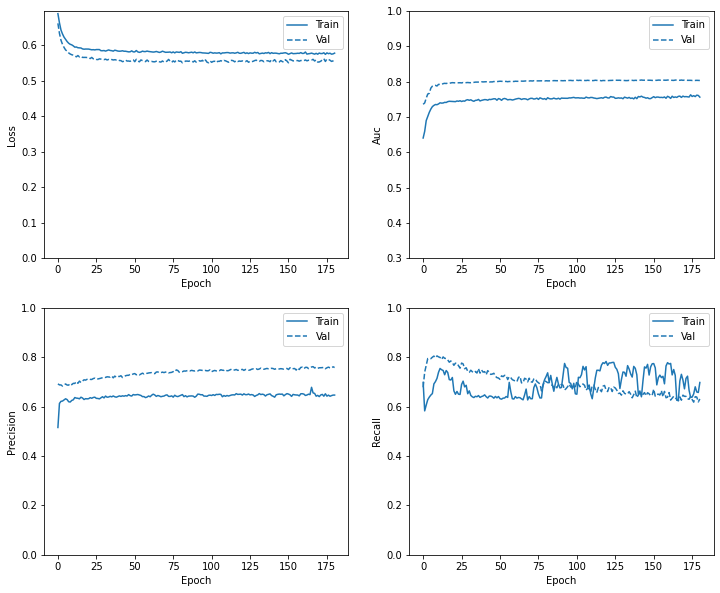

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=2*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/400
20/20 [==============================] - 3s 53ms/step - loss: 0.7012 - tp: 3800.4762 - fp: 1968.9524 - tn: 3654.0952 - fn: 1833.2857 - accuracy: 0.6654 - precision: 0.6667 - recall: 0.6721 - auc: 0.7492 - val_loss: 0.6930 - val_tp: 4213.0000 - val_fp: 4240.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.4984 - val_precision: 0.4984 - val_recall: 1.0000 - val_auc: 0.5891
Epoch 2/400
20/20 [==============================] - 0s 9ms/step - loss: 0.7003 - tp: 1156.9524 - fp: 1081.9524 - tn: 275.6667 - fn: 289.2381 - accuracy: 0.5135 - precision: 0.5222 - recall: 0.7999 - auc: 0.5082 - val_loss: 0.6914 - val_tp: 4213.0000 - val_fp: 4240.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.4984 - val_precision: 0.4984 - val_recall: 1.0000 - val_auc: 0.6445
Epoch 3/400
20/20 [==============================] - 0s 10ms/step - loss: 0.6989 - tp: 1103.0000 - fp: 1108.3810 - tn: 290.0000 - fn: 302.4286 - accuracy: 0.4965 - precision: 0.4952 - recall: 0.7874 

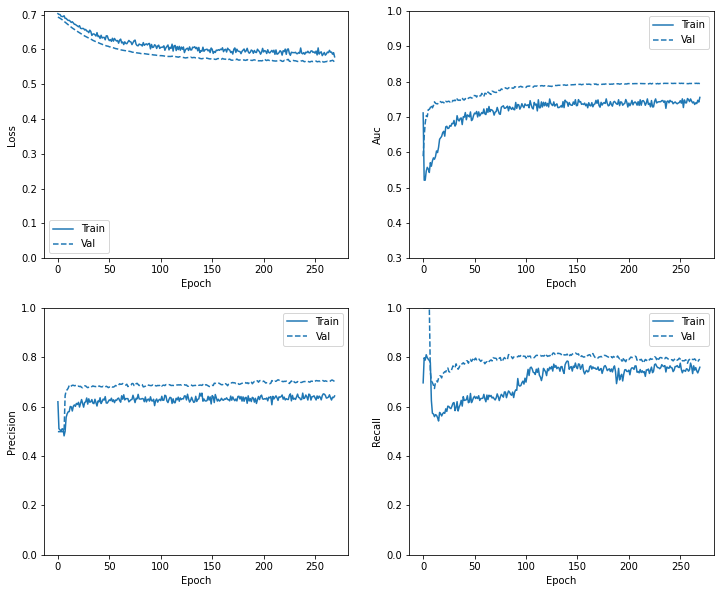

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5651955604553223
tp :  3353.0
fp :  1441.0
tn :  2799.0
fn :  860.0
accuracy :  0.7277889251708984
precision :  0.699415922164917
recall :  0.7958699464797974
auc :  0.7958680391311646

(True Negatives):  2799
 (False Positives):  1441
(False Negatives):  860
 (True Positives):  3353
Total Transactions:  4213


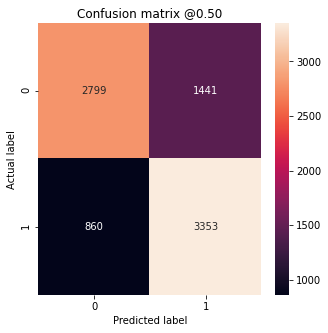

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

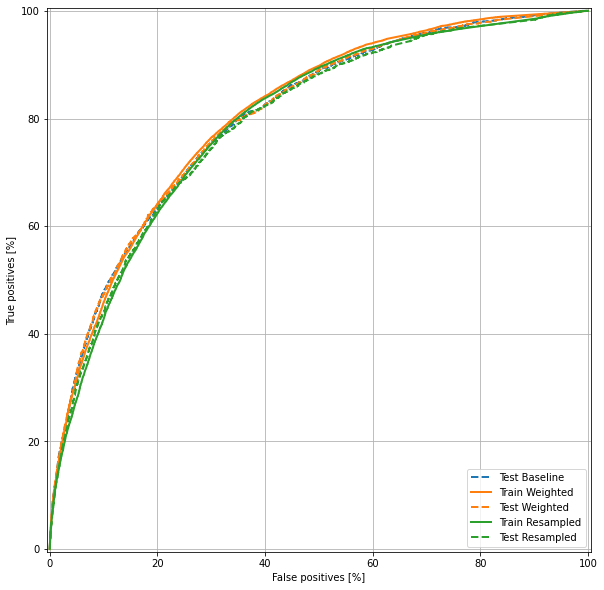

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')